Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date, datetime
sns.set(font_scale=2)

Obtain the dataset

In [2]:
bp = pd.read_excel(r'./../data/20220405/bp_20220405.xlsx')

bp.head()


userID  systolic  diastolic  pulse          recordTime  \
0   14536       106         76     55 2022-04-05 06:59:03   
1   14487       147         87     64 2022-04-05 06:30:00   
2   14443       120         78     65 2022-04-05 04:35:37   
3   14536       119         58     53 2022-04-04 20:41:44   
4   14487       143         82     71 2022-04-04 16:45:00   

                                              notes deviceID  unit  
0  5/4 06.59 after  morning  walking  for 1. hour.    manual  mmHg  
1                                               NaN   manual  mmHg  
2                                               NaN   manual  mmHg  
3               4/4 20.41 after exercise /walking.    manual  mmHg  
4                                               NaN   manual  mmHg

In [3]:
user = pd.read_excel(r'./../data/20220405/user_20220405.xlsx')
user.head()

userID  gender             birthday  height height_unit  marital smoking  \
0   14677    Male  1946-03-21 00:00:00   180.0          cm  Married      No   
1   14645  Female  1966-06-29 00:00:00   155.0          cm      NaN     Yes   
2   14614  Female  1974-12-14 00:00:00   161.0          cm      NaN     Yes   
3   14593    Male  1985-03-30 00:00:00   168.0          cm   Single      No   
4   14592  Female  1977-12-10 00:00:00   155.0          cm      NaN     Yes   

      race  weight  life_style                      Eduction  
0   Indian    80.0         1.2  College/university completed  
1      NaN    57.0         0.0                           NaN  
2      NaN    78.5         0.0                           NaN  
3  Chinese    84.0         1.2  College/university completed  
4      NaN    57.0         0.0                           NaN

Remove Time from birthday ( a record with 1000-04-25 00:00:00 was found)

In [4]:
user['birthday']=pd.to_datetime(user['birthday'], errors = 'coerce')



In [5]:
user['birthday'] = pd.to_datetime(user['birthday']).dt.date

In [6]:
def age(born):
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
  

In [7]:
user['age'] = user['birthday'].apply(age)

In [8]:
user.head()

userID  gender    birthday  height height_unit  marital smoking     race  \
0   14677    Male  1946-03-21   180.0          cm  Married      No   Indian   
1   14645  Female  1966-06-29   155.0          cm      NaN     Yes      NaN   
2   14614  Female  1974-12-14   161.0          cm      NaN     Yes      NaN   
3   14593    Male  1985-03-30   168.0          cm   Single      No  Chinese   
4   14592  Female  1977-12-10   155.0          cm      NaN     Yes      NaN   

   weight  life_style                      Eduction   age  
0    80.0         1.2  College/university completed  76.0  
1    57.0         0.0                           NaN  55.0  
2    78.5         0.0                           NaN  47.0  
3    84.0         1.2  College/university completed  37.0  
4    57.0         0.0                           NaN  44.0

In [9]:
bp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   userID      3630 non-null   int64         
 1   systolic    3630 non-null   int64         
 2   diastolic   3630 non-null   int64         
 3   pulse       3630 non-null   int64         
 4   recordTime  3630 non-null   datetime64[ns]
 5   notes       778 non-null    object        
 6   deviceID    3266 non-null   object        
 7   unit        3630 non-null   object        
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 227.0+ KB


In [10]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userID       106 non-null    int64  
 1   gender       106 non-null    object 
 2   birthday     105 non-null    object 
 3   height       106 non-null    float64
 4   height_unit  106 non-null    object 
 5   marital      47 non-null     object 
 6   smoking      106 non-null    object 
 7   race         51 non-null     object 
 8   weight       106 non-null    float64
 9   life_style   106 non-null    float64
 10  Eduction     50 non-null     object 
 11  age          105 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 10.1+ KB


Missing values in the dataset

In [11]:
bp.isna().sum()

userID           0
systolic         0
diastolic        0
pulse            0
recordTime       0
notes         2852
deviceID       364
unit             0
dtype: int64

In [12]:
user.isna().sum()

userID          0
gender          0
birthday        1
height          0
height_unit     0
marital        59
smoking         0
race           55
weight          0
life_style      0
Eduction       56
age             1
dtype: int64

Structure of the dataset

In [13]:
bp.shape

(3630, 8)

In [14]:
user.shape

(106, 12)

Seperating numerical features in Blood Pressure dataset

In [15]:
num = ['systolic', 'diastolic','pulse']
time = ['recordDateTime']

In [16]:
bp[num].describe()

systolic    diastolic        pulse
count   3630.000000  3630.000000  3630.000000
mean     133.898072    78.535813    75.245179
std      211.306626   106.093948   110.242144
min       59.000000     0.000000     0.000000
25%      119.000000    68.000000    64.000000
50%      130.000000    78.000000    72.000000
75%      139.000000    85.000000    81.000000
max    12822.000000  6423.000000  6564.000000

In [17]:
bp['deviceID'].value_counts()


manual    2178
B3 BT     1088
Name: deviceID, dtype: int64

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


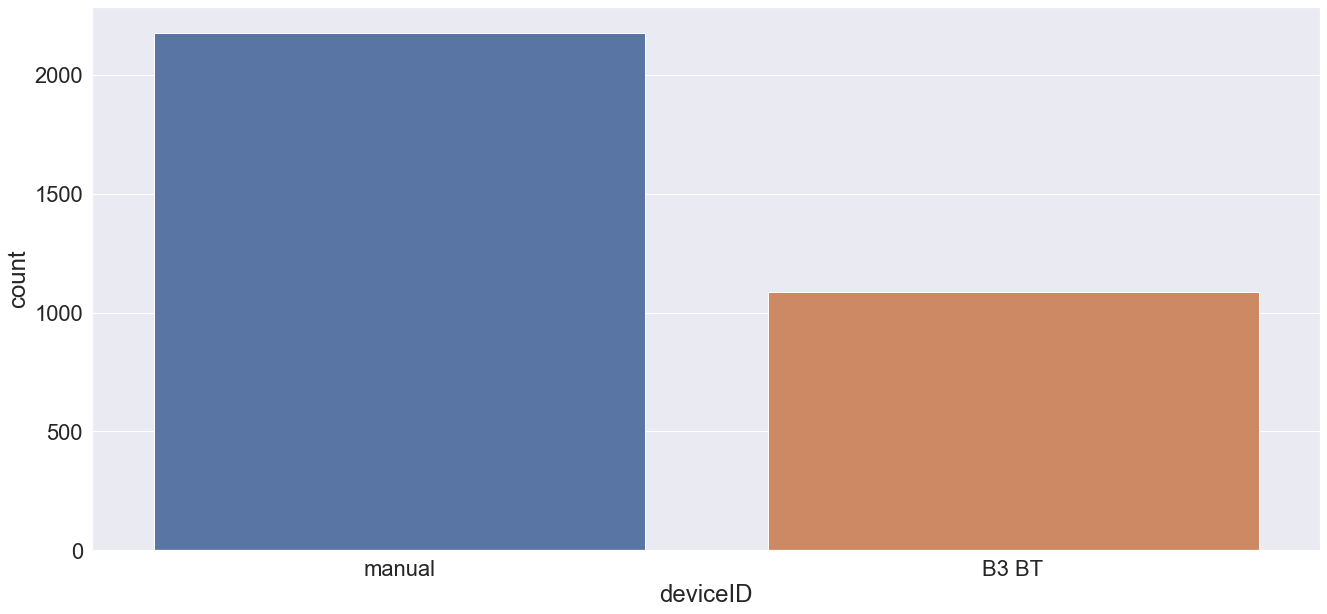

In [18]:
plt.figure(figsize=(22,10))
sns.countplot(bp['deviceID'])
plt.show()

In [19]:
bp['unit'].value_counts()


mmHg    3630
Name: unit, dtype: int64

Boxplot to detect outliers

<AxesSubplot:xlabel='systolic'>

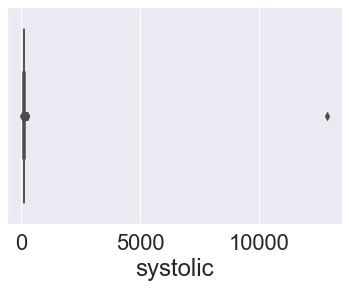

In [20]:
sns.boxplot(x=bp['systolic'])



<AxesSubplot:xlabel='diastolic'>

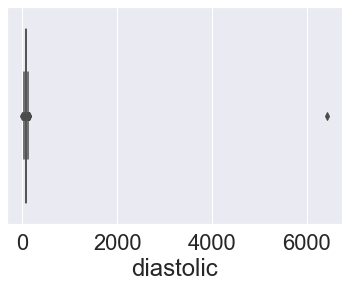

In [21]:
sns.boxplot(x=bp['diastolic'])


<AxesSubplot:xlabel='pulse'>

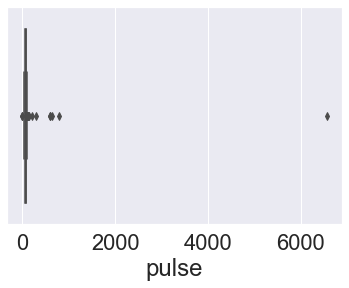

In [22]:
sns.boxplot(x=bp['pulse'])


Correlation

systolic  diastolic     pulse
systolic   1.000000   0.002779 -0.001047
diastolic  0.002779   1.000000  0.976888
pulse     -0.001047   0.976888  1.000000

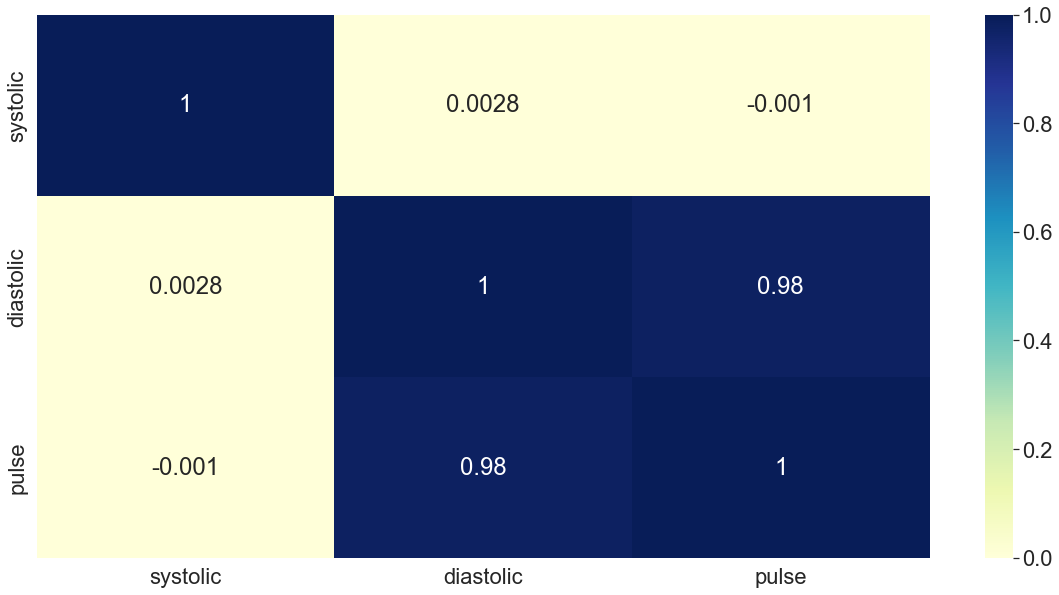

In [23]:
plt.figure(figsize=(20,10))
c= bp[num].corr()
sns.heatmap(c,cmap="YlGnBu",annot=True)
c

In [24]:
bp

userID  systolic  diastolic  pulse          recordTime  \
0      14536       106         76     55 2022-04-05 06:59:03   
1      14487       147         87     64 2022-04-05 06:30:00   
2      14443       120         78     65 2022-04-05 04:35:37   
3      14536       119         58     53 2022-04-04 20:41:44   
4      14487       143         82     71 2022-04-04 16:45:00   
...      ...       ...        ...    ...                 ...   
3625   14042       112         85     91 2021-07-19 08:12:24   
3626   14042       109         83     85 2021-07-19 08:11:47   
3627   14042       109         83     85 2021-07-19 08:11:47   
3628   14042       112         82     86 2021-07-18 15:07:41   
3629   14042       115         84     83 2021-07-18 15:07:03   

                                                 notes deviceID  unit  
0     5/4 06.59 after  morning  walking  for 1. hour.    manual  mmHg  
1                                                  NaN   manual  mmHg  
2                                                  NaN   manual  mmHg  
3                  4/4 20.41 after exercise /walking.    manual  mmHg  
4                                                  NaN   manual  mmHg  
...                                                ...      ...   ...  
3625                                  before breakfast   manual  mmHg  
3626                                  before breakfast   manual  mmHg  
3627                                  before breakfast   manual  mmHg  
3628                                      before lunch   manual  mmHg  
3629                                      before lunch   manual  mmHg  

[3630 rows x 8 columns]

Time series plot( Plan to make a time series plot based on the user ID for systolic, diastolic and pulse but inconsistency may be the problem)

In [25]:
#sns.relplot(data = bp, x = 'recordTime',y='systolic',
#            row = 'userID',kind = 'line', sizes=(1000, 10))





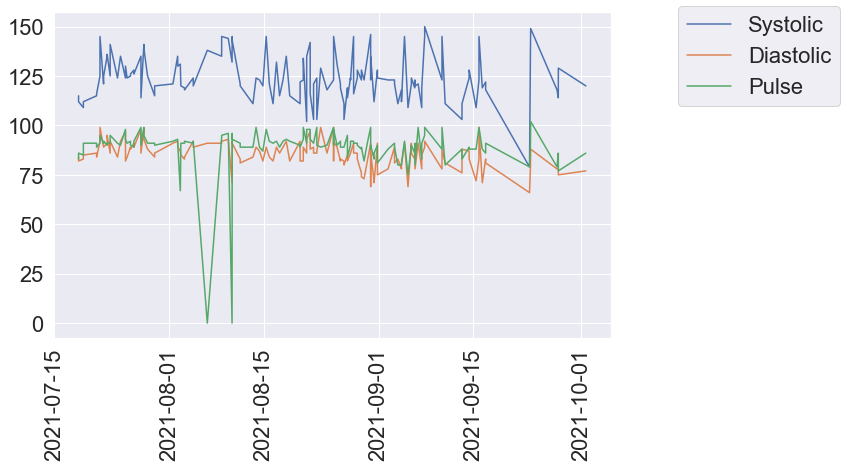

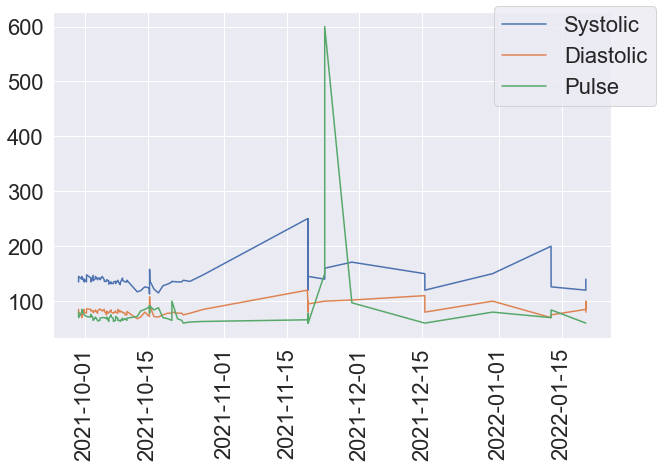

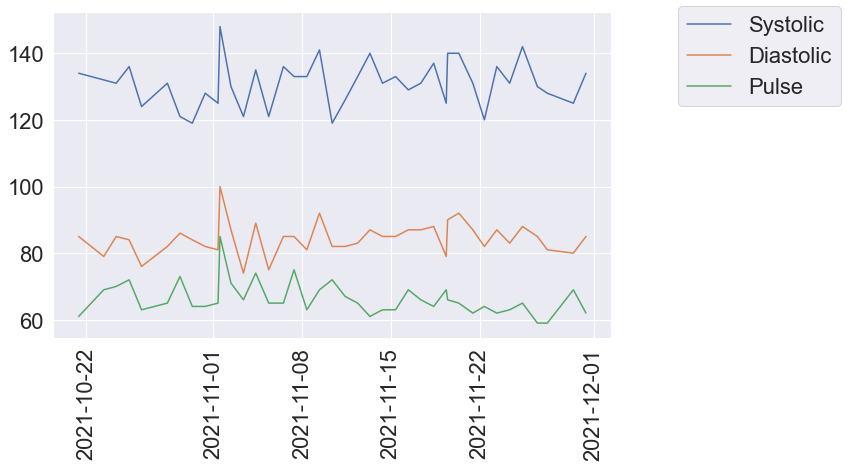

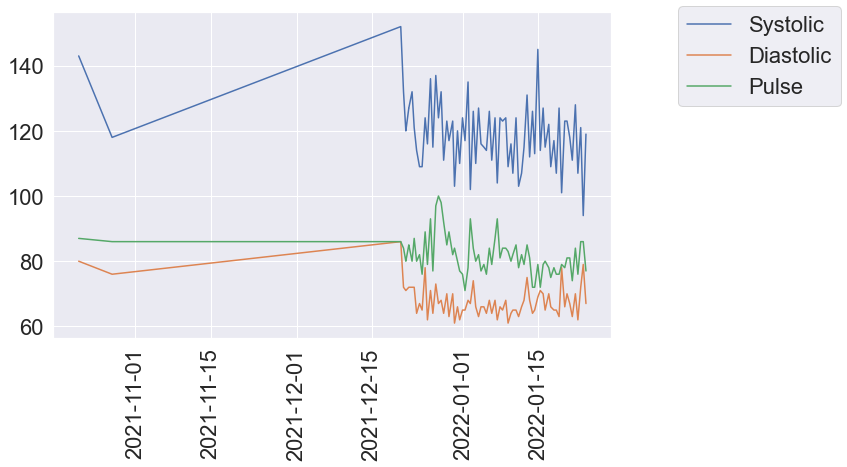

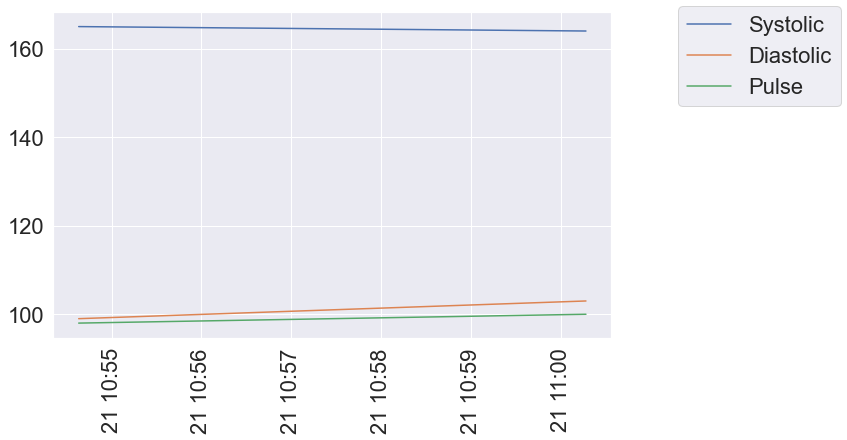

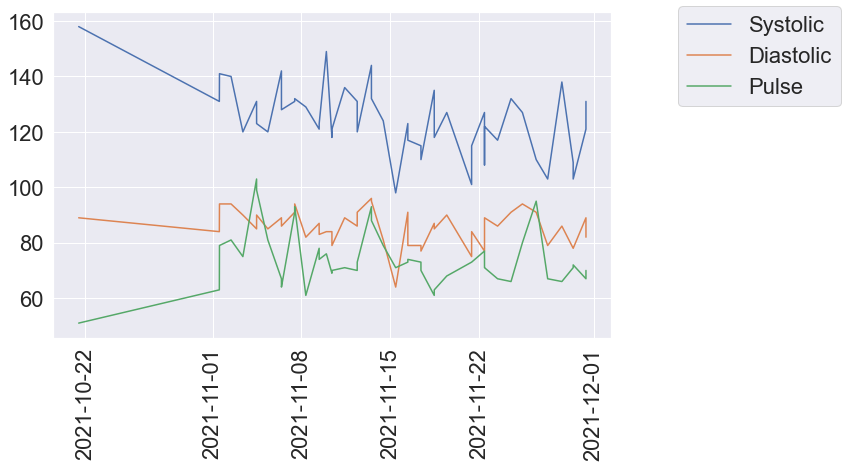

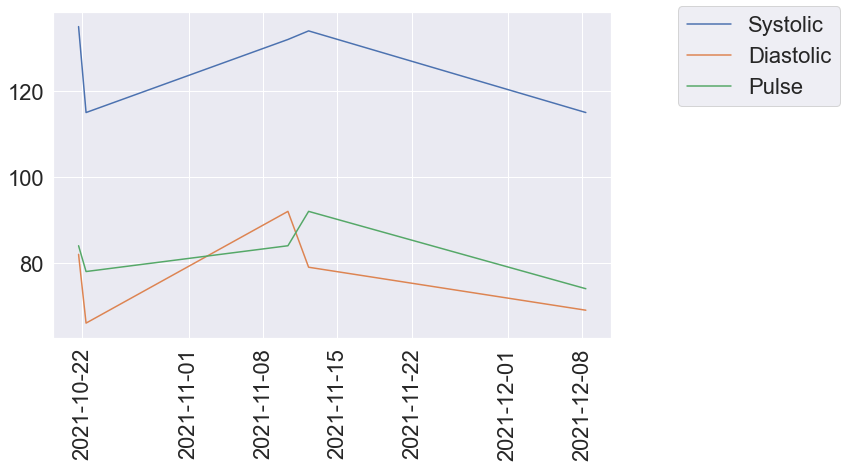

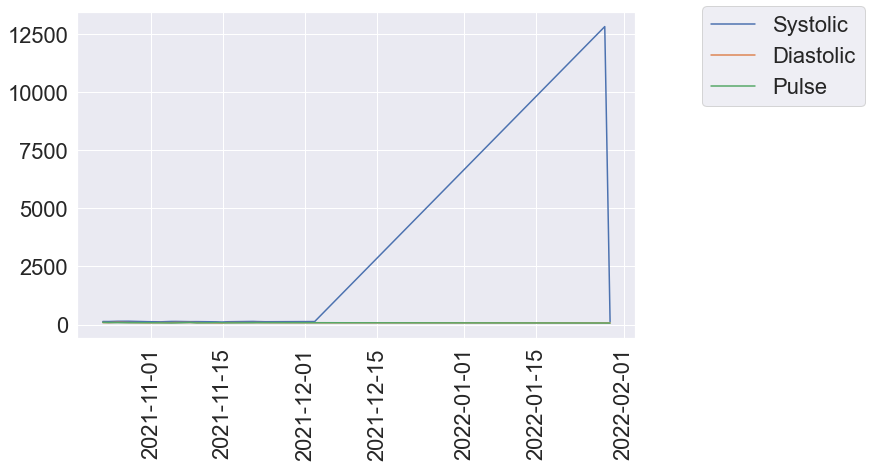

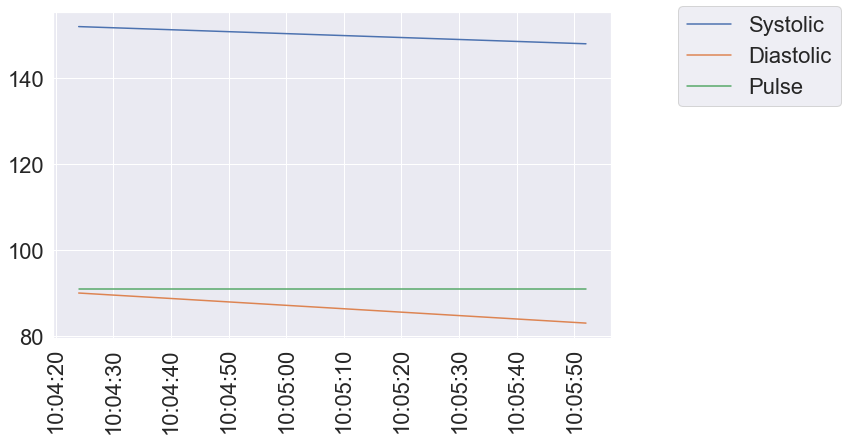

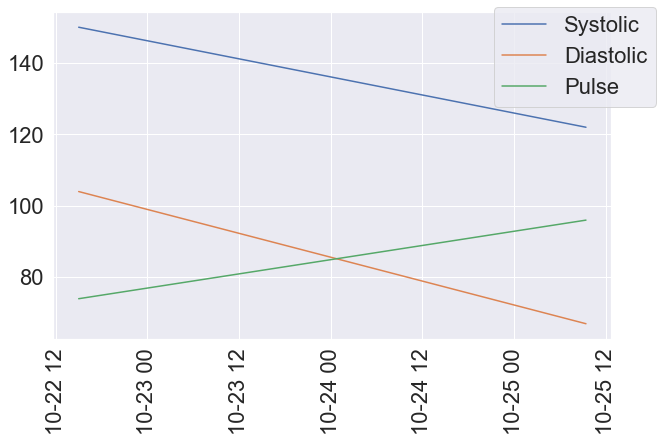

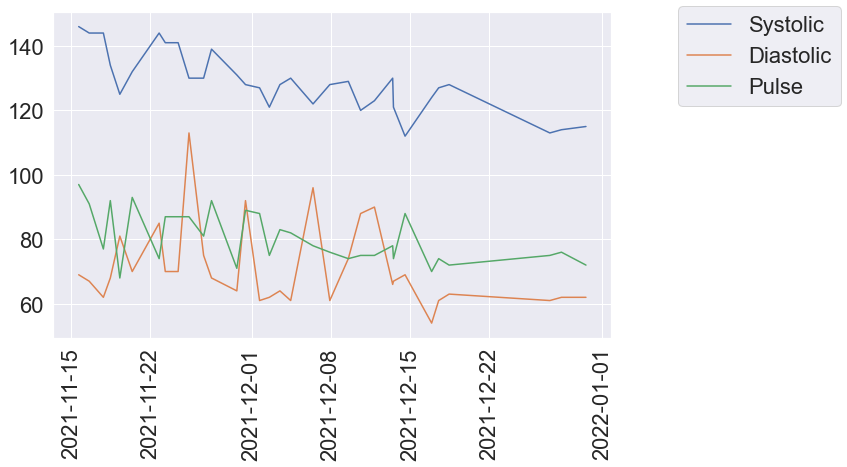

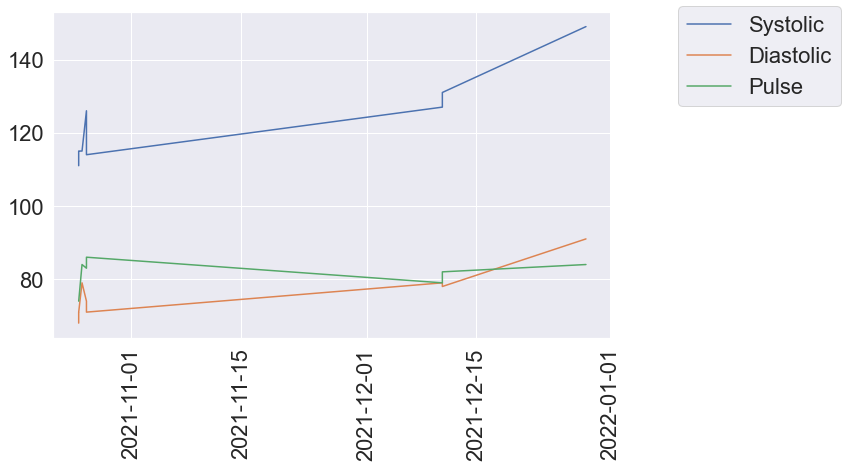

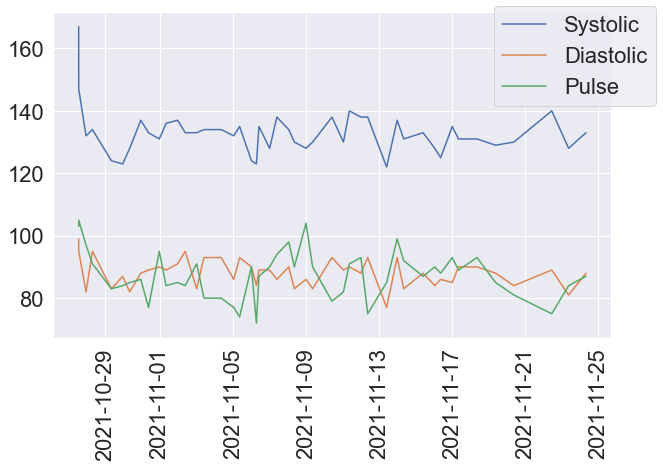

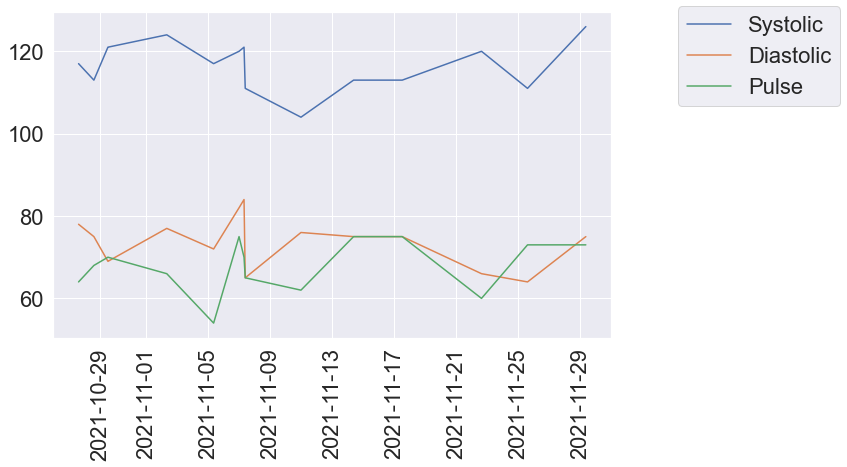

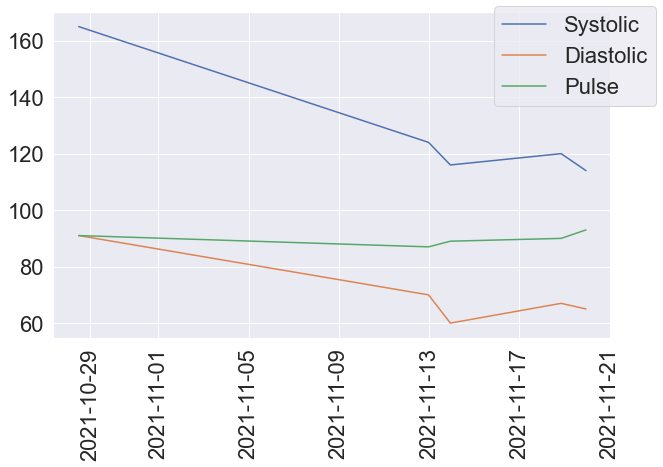

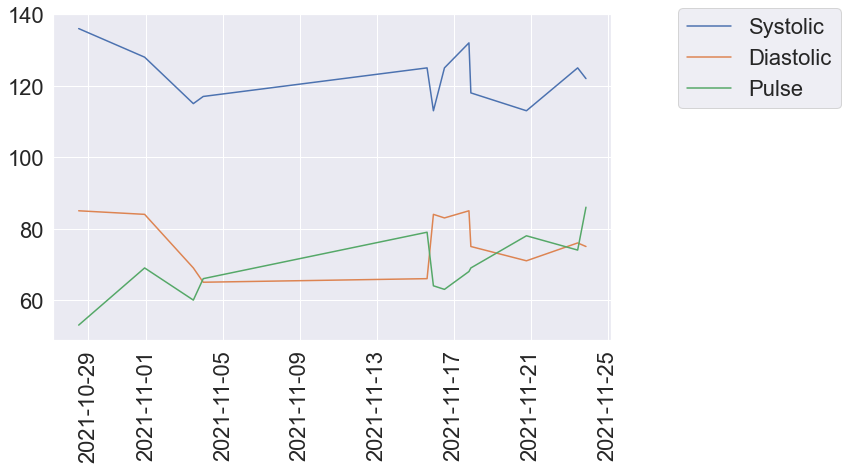

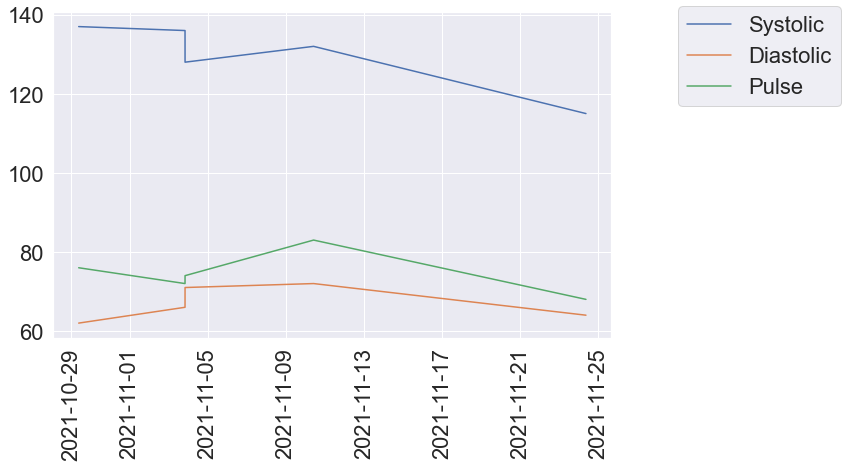

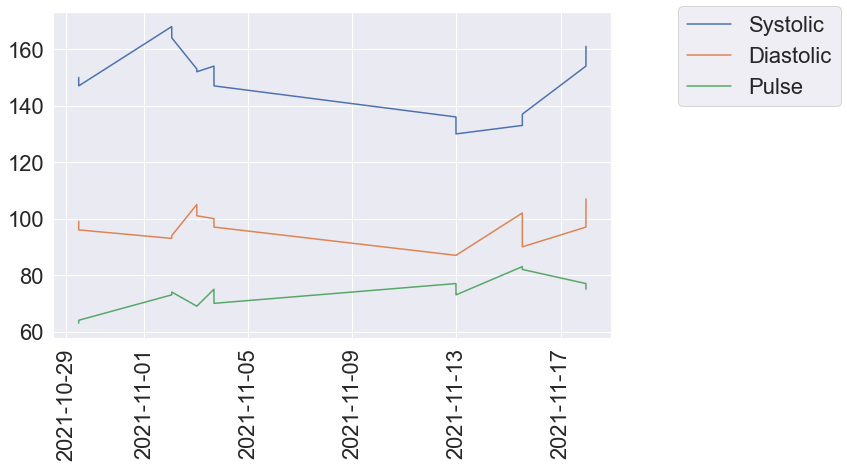

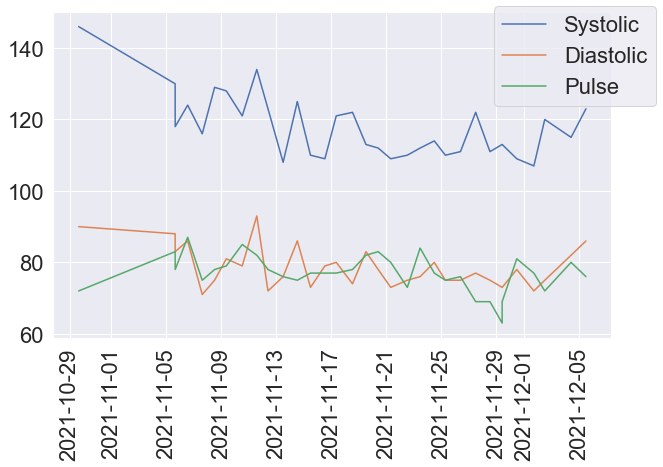

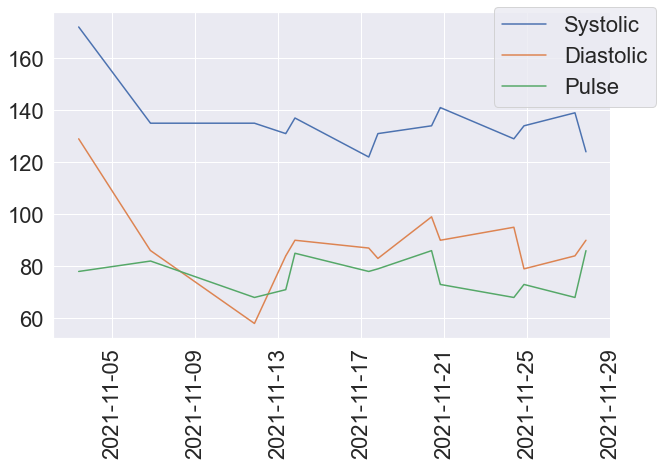

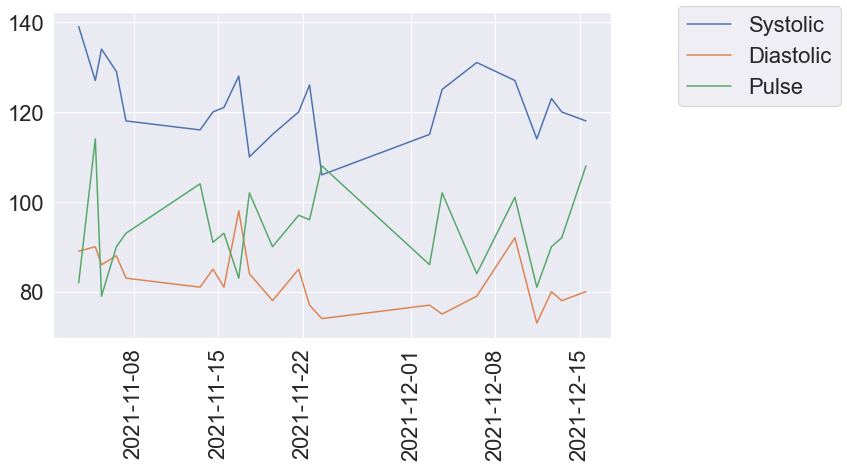

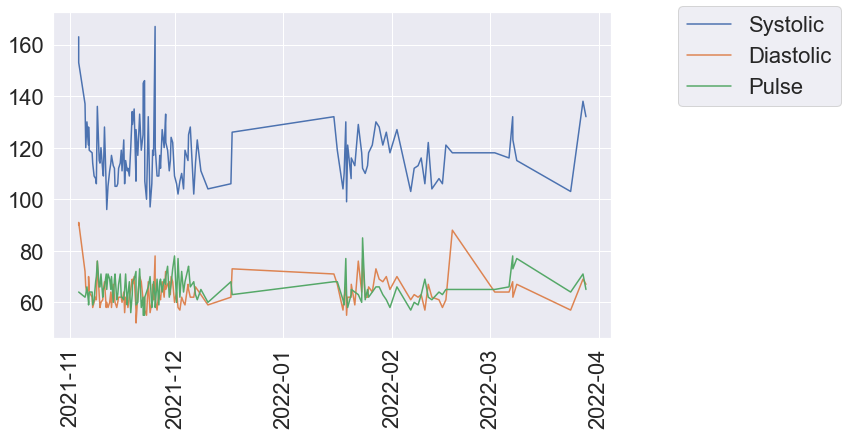

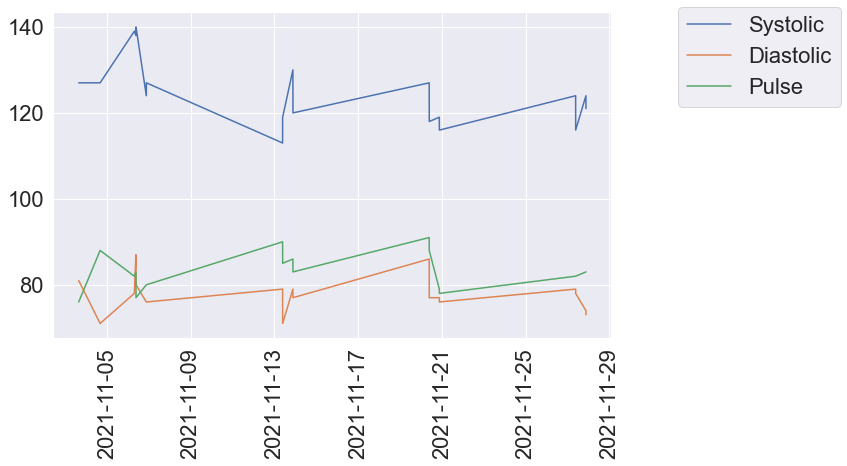

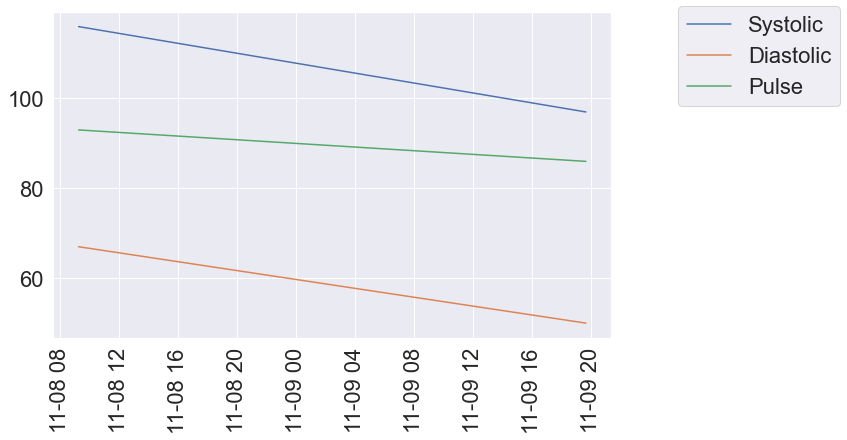

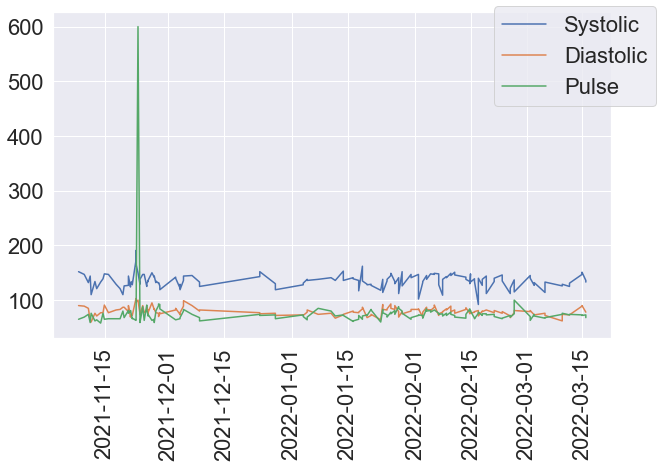

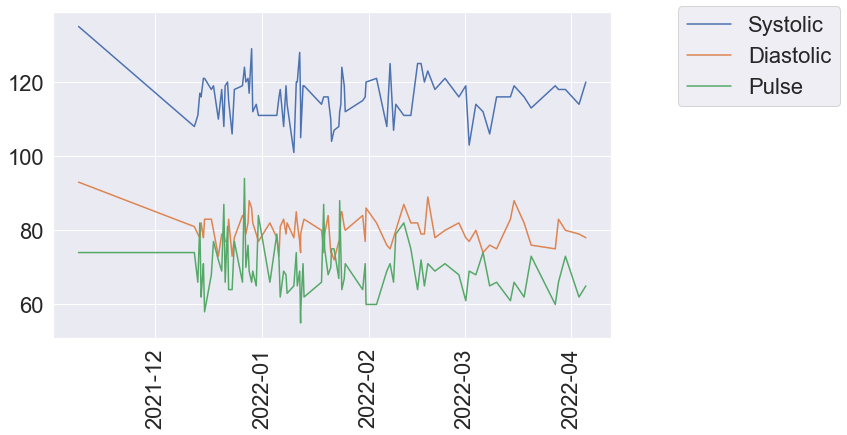

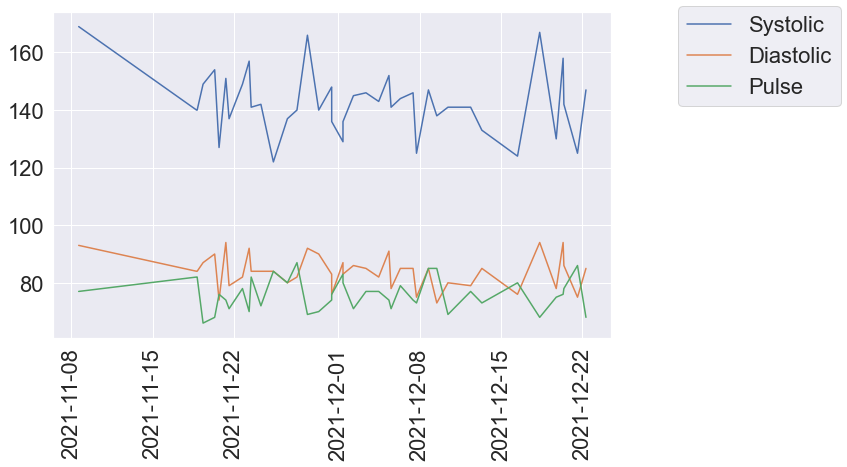

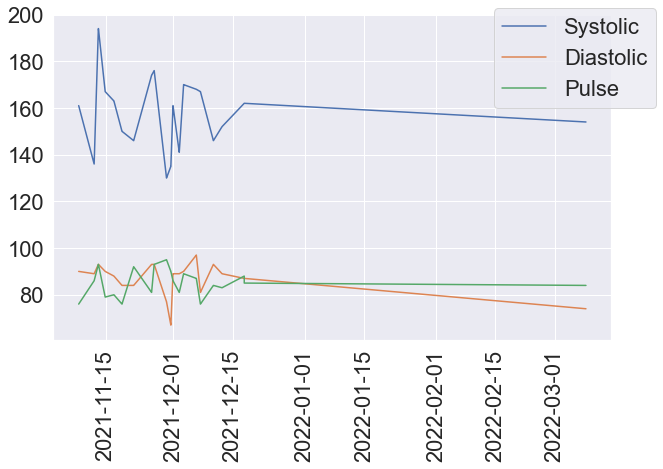

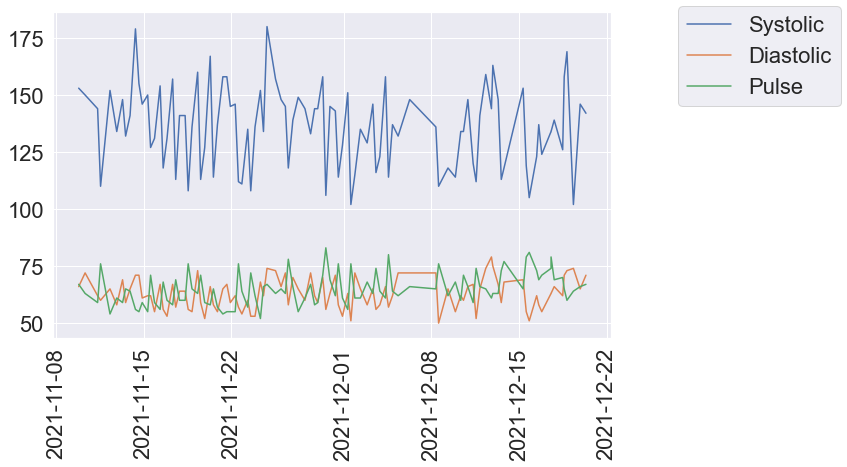

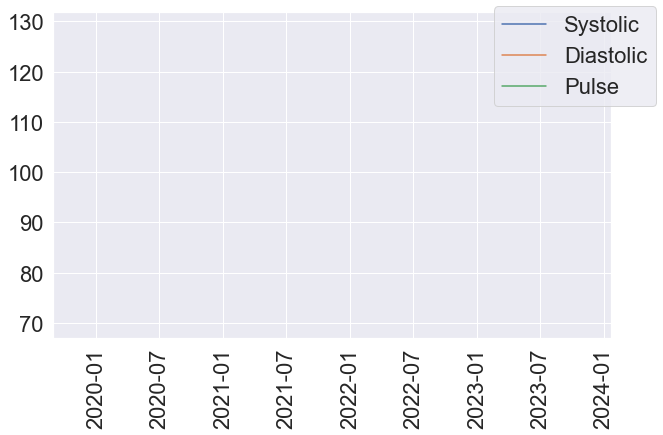

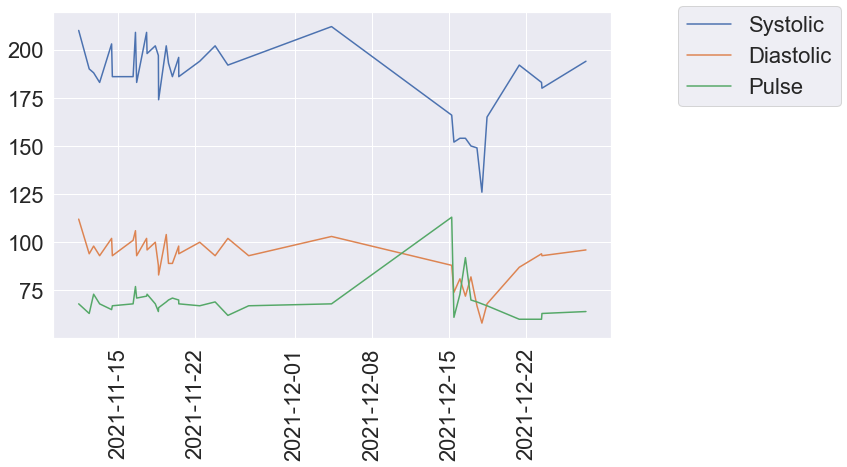

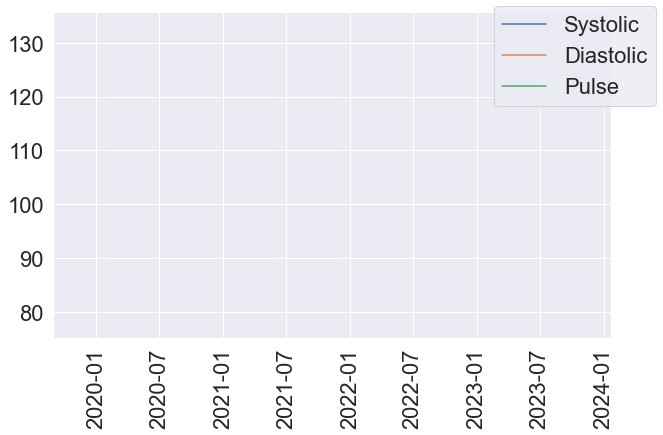

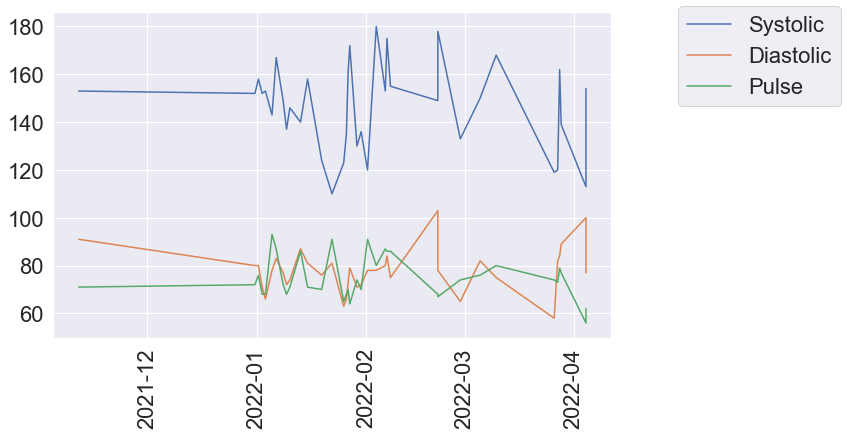

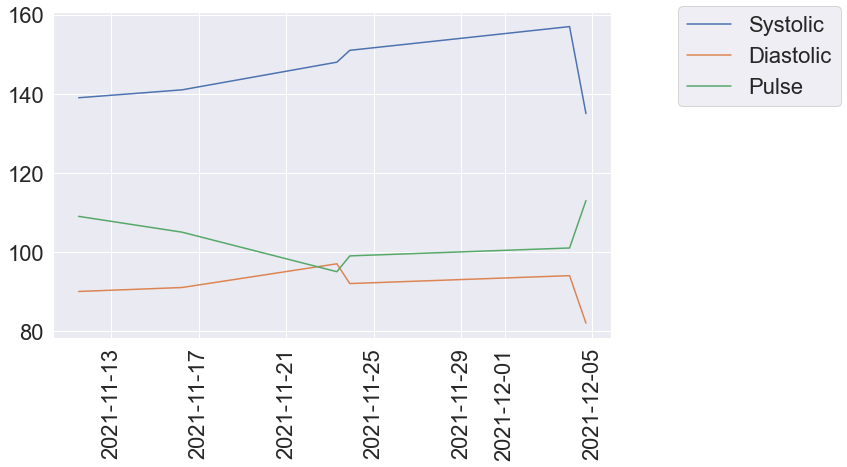

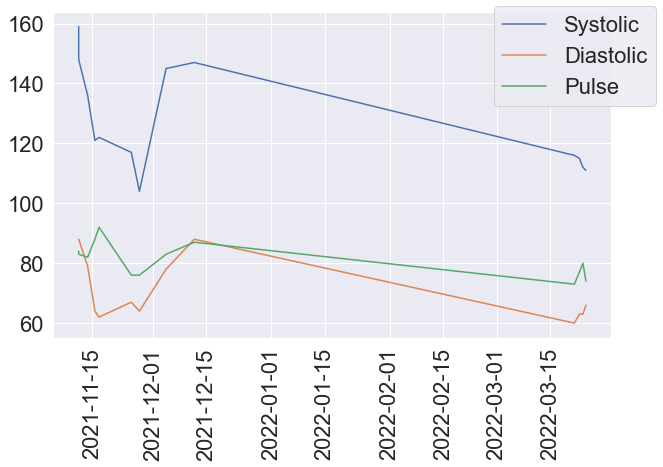

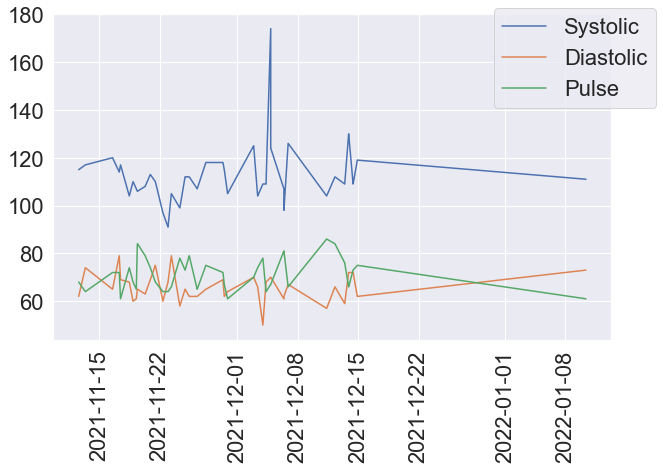

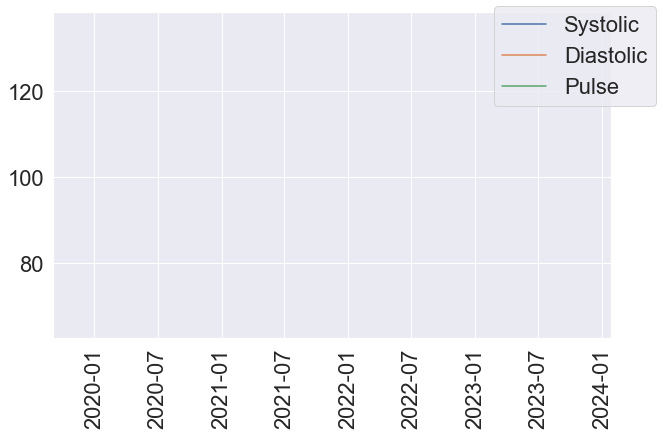

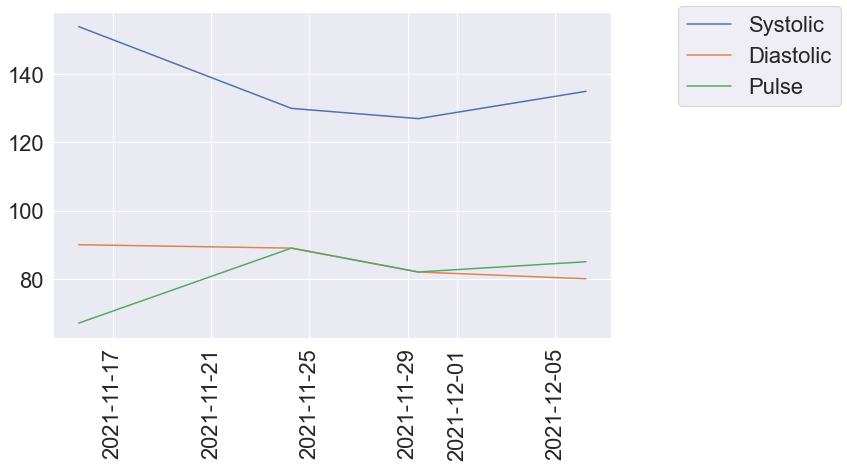

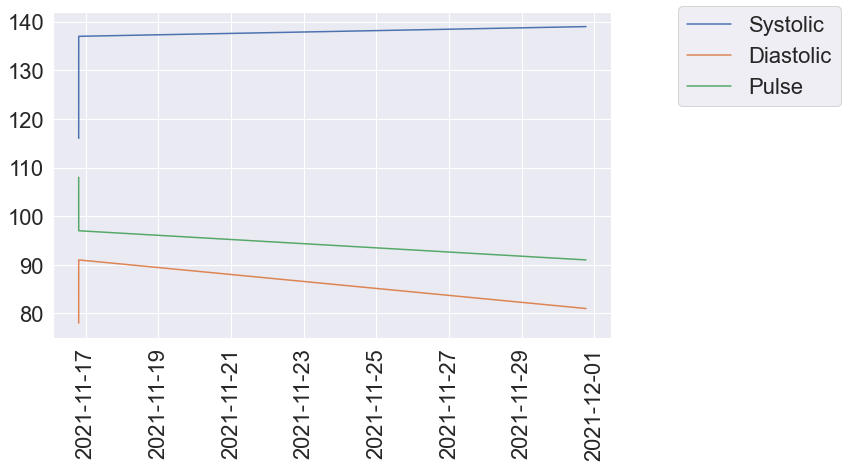

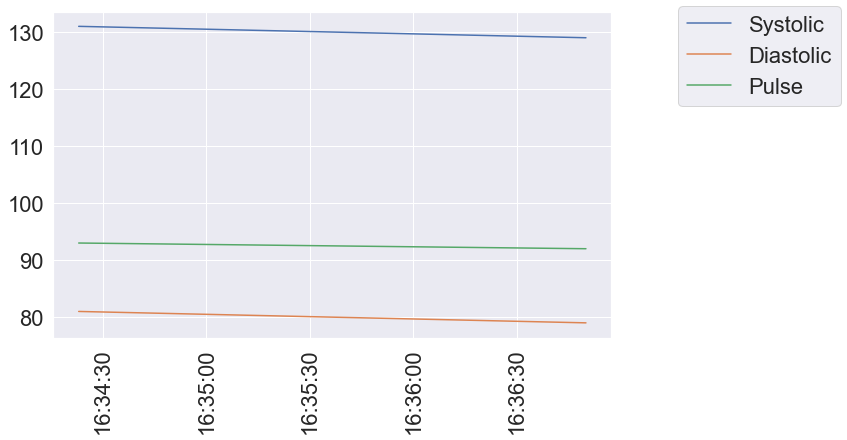

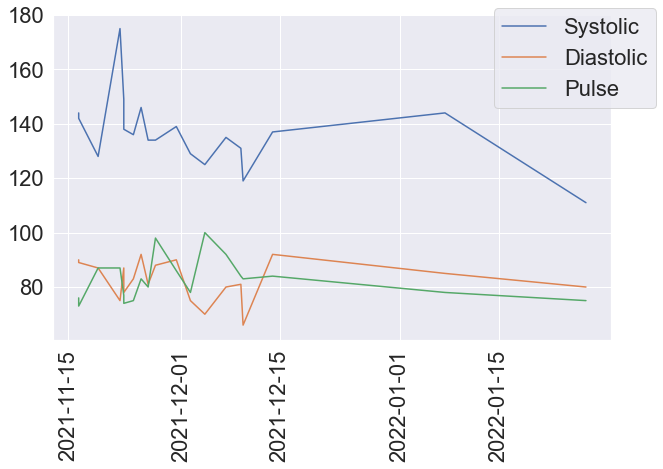

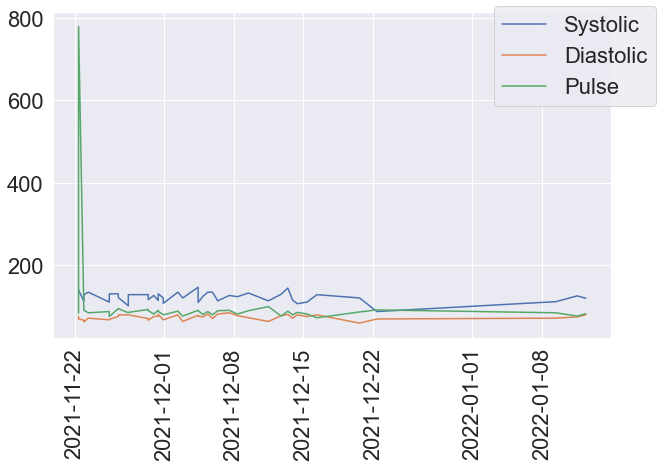

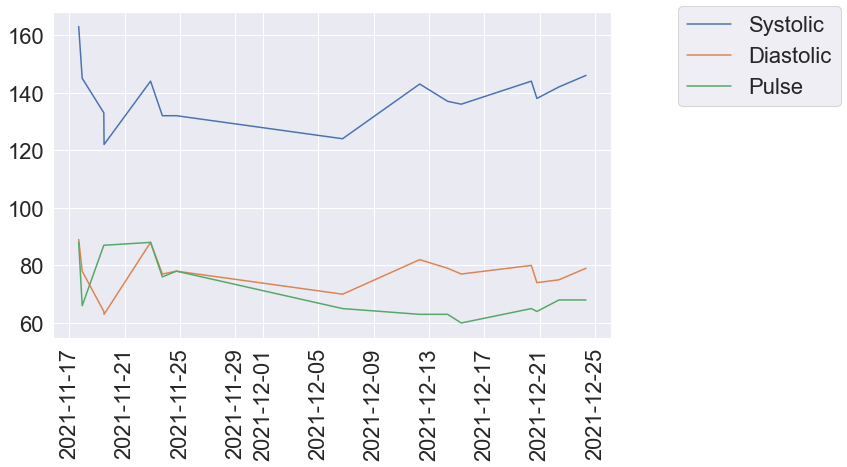

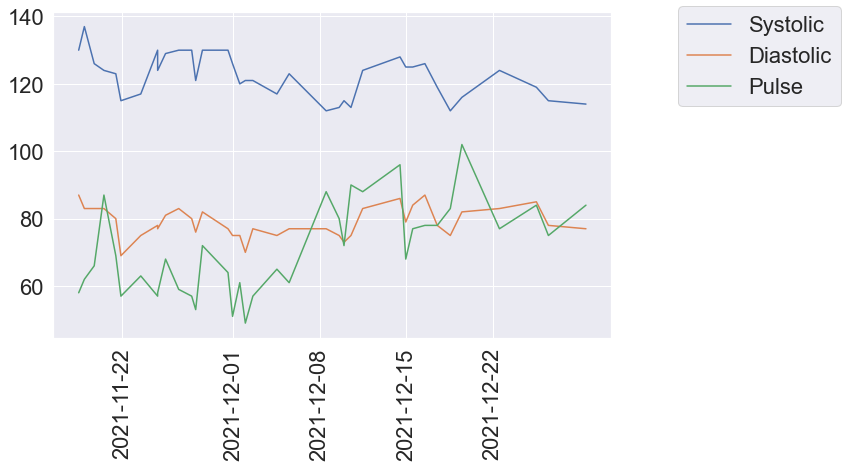

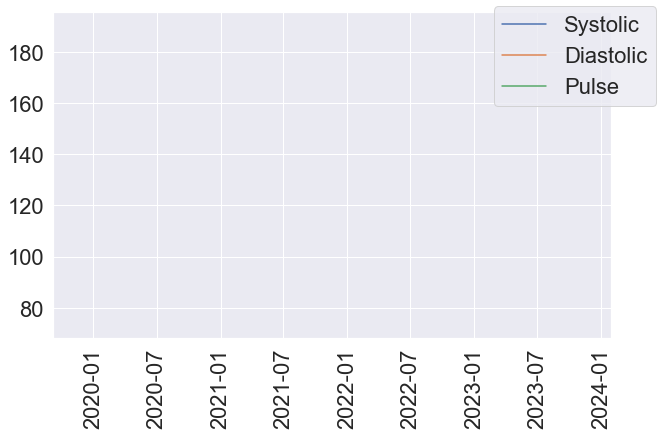

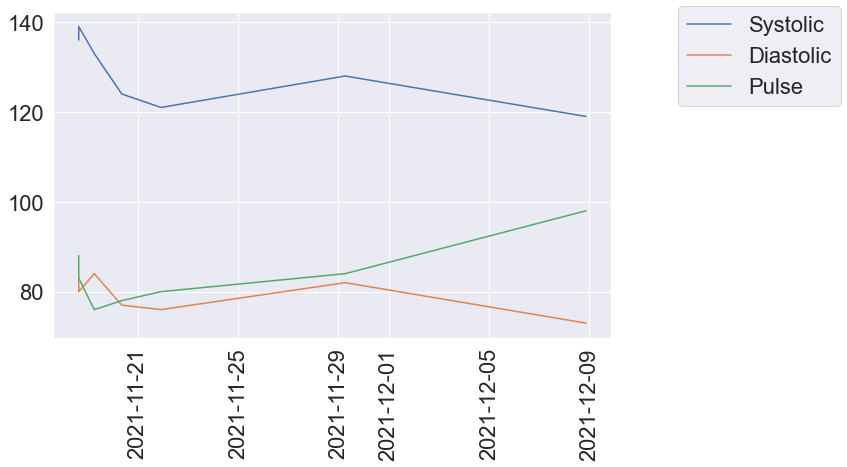

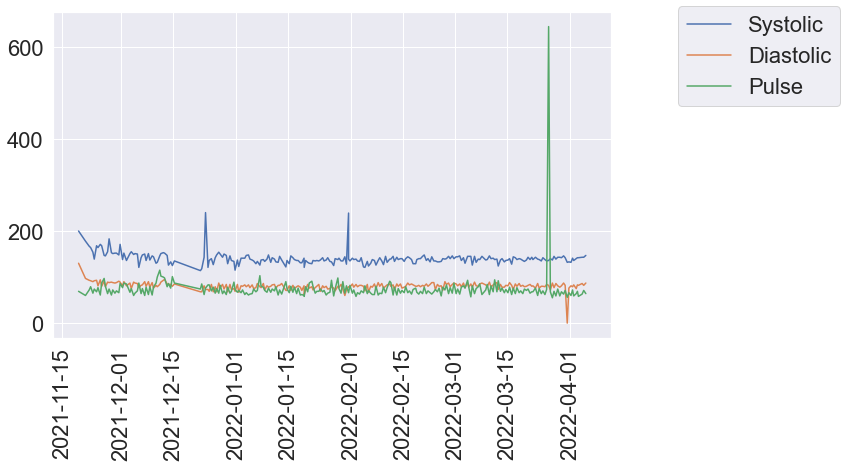

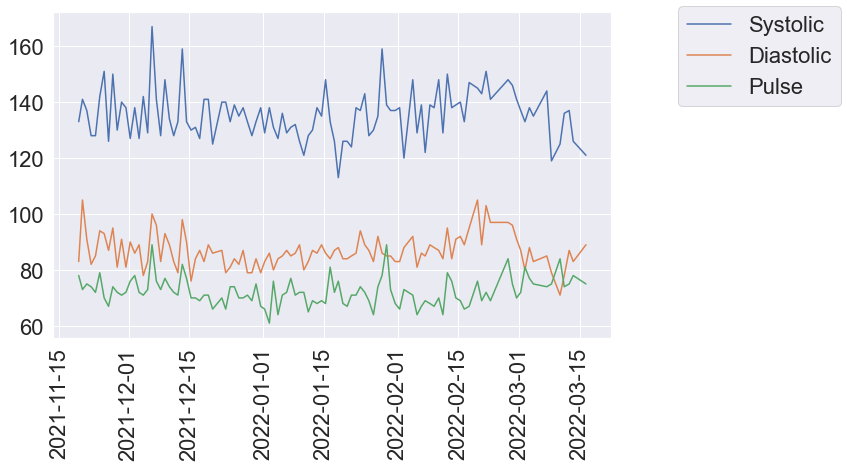

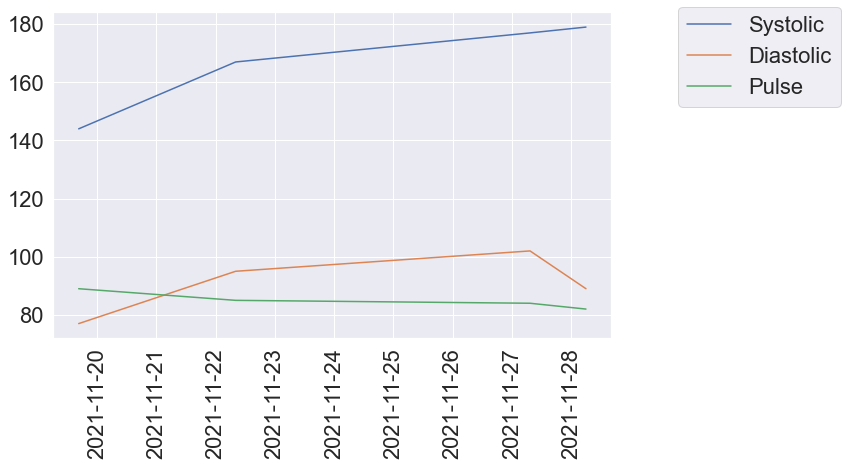

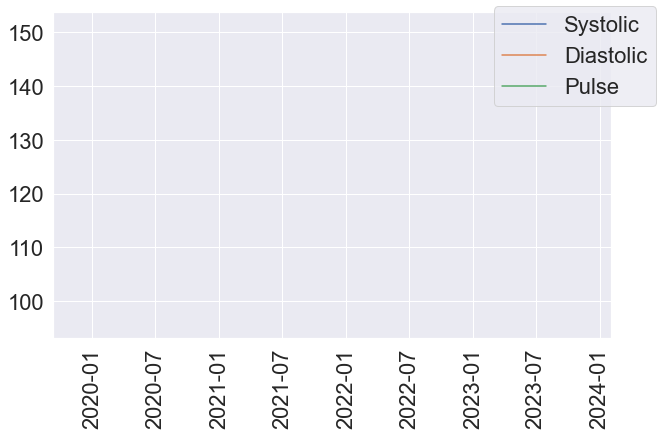

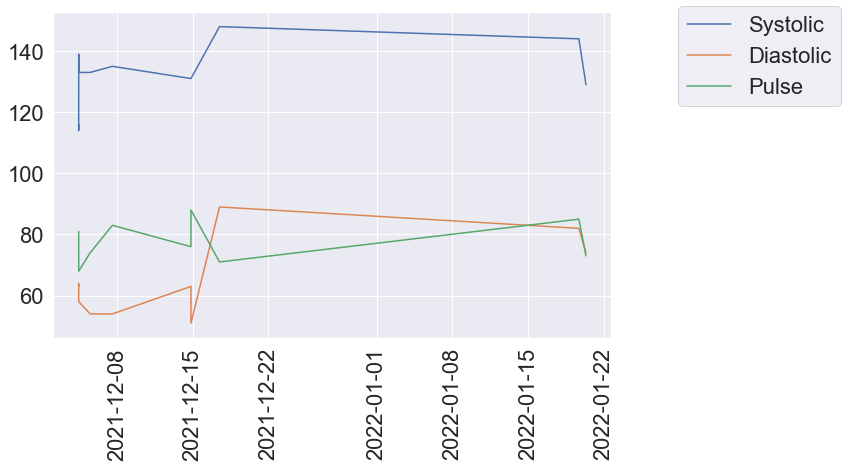

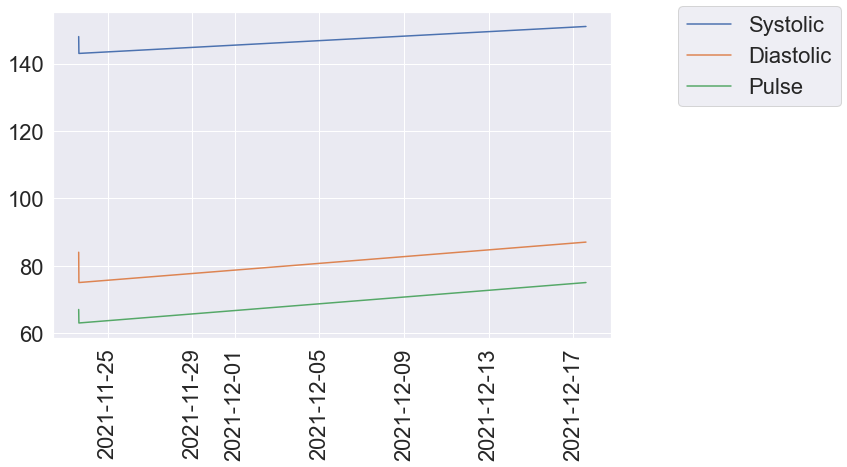

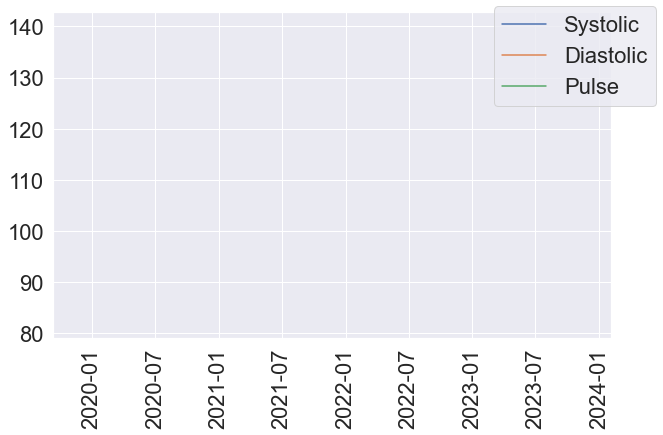

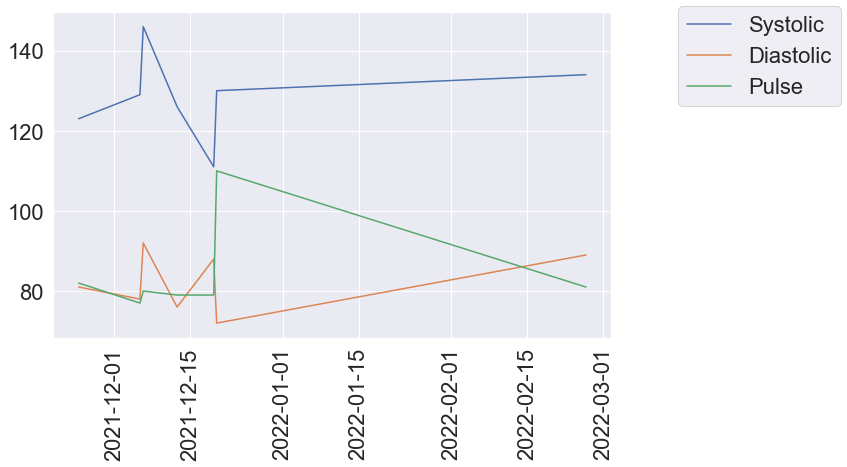

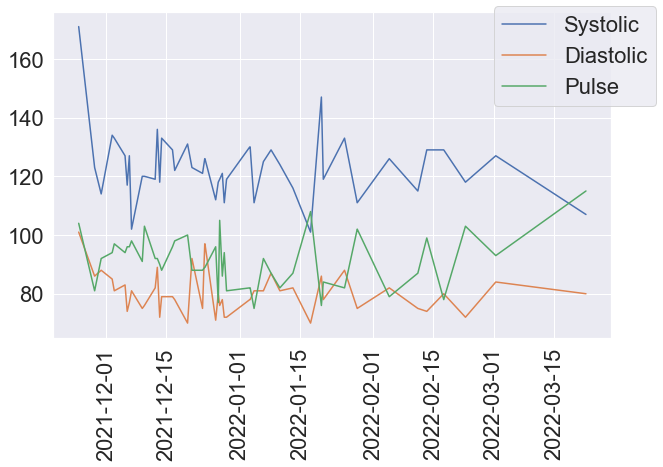

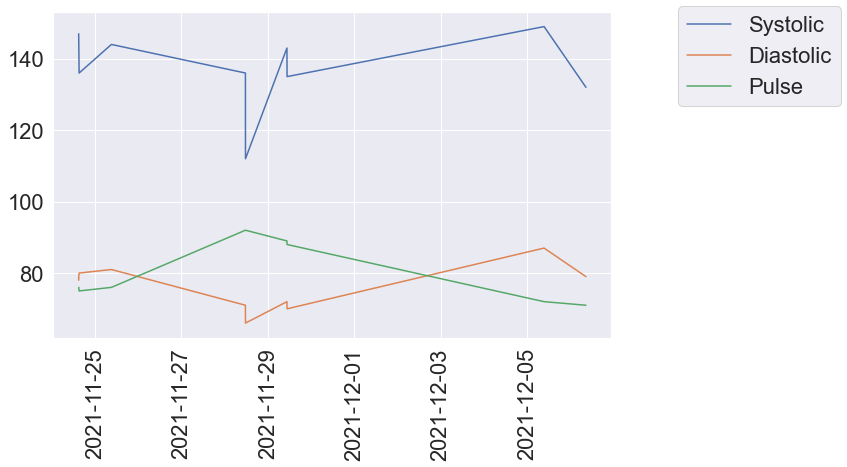

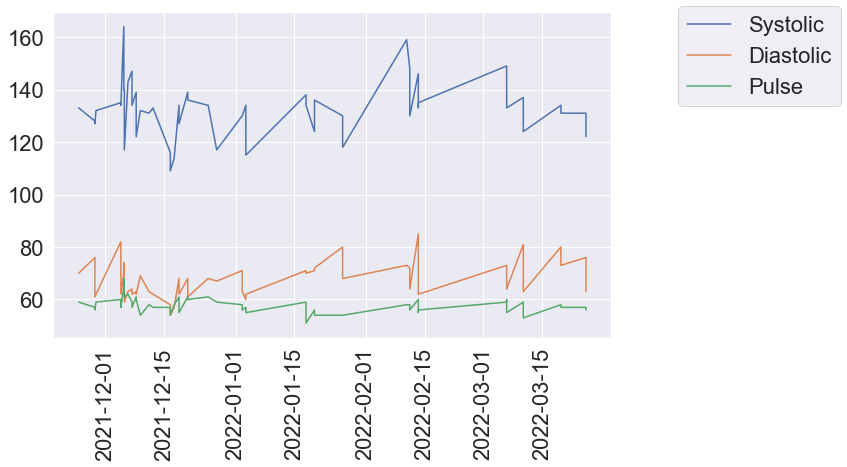

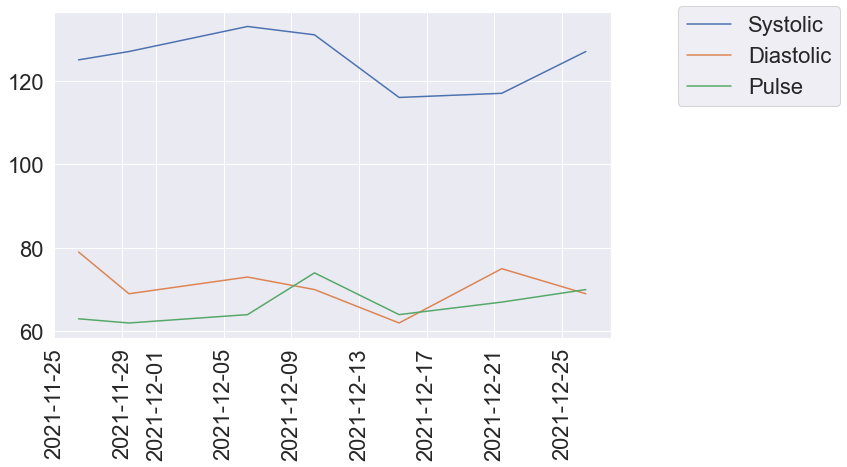

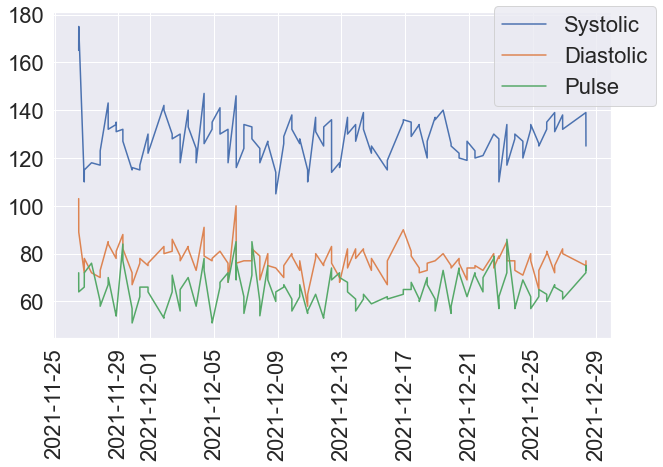

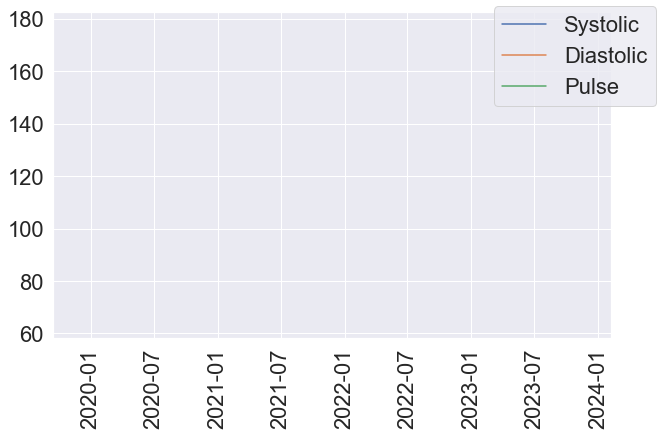

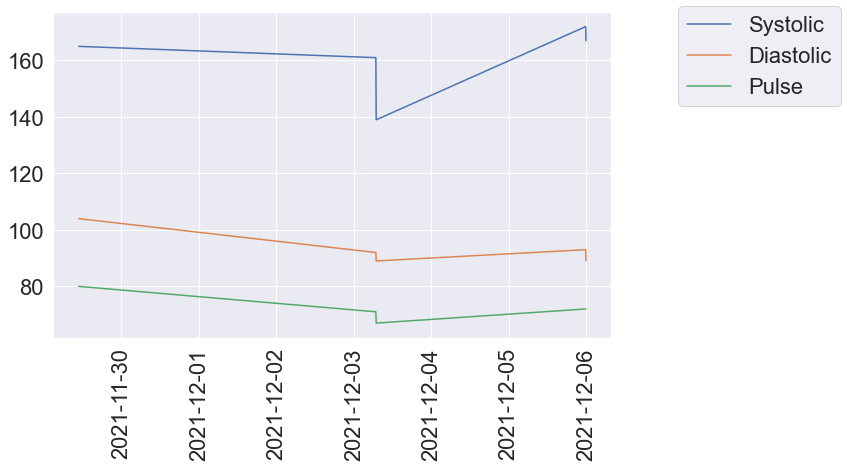

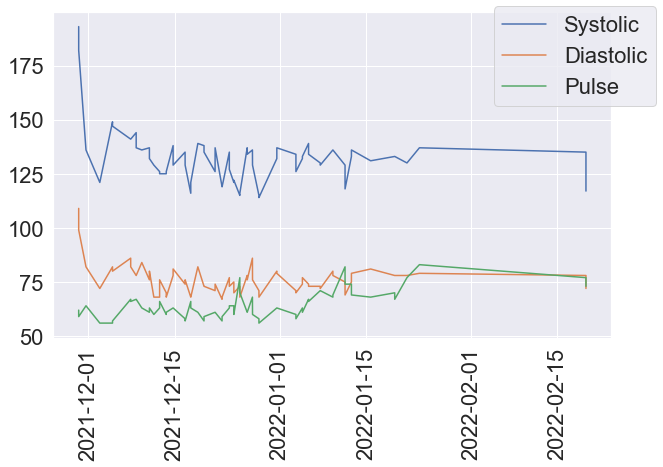

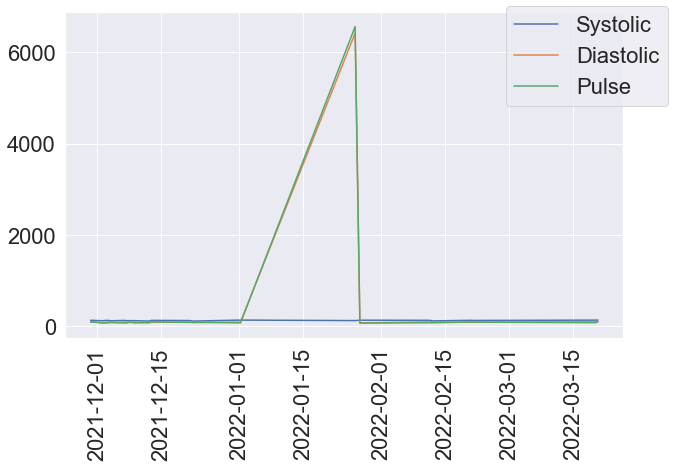

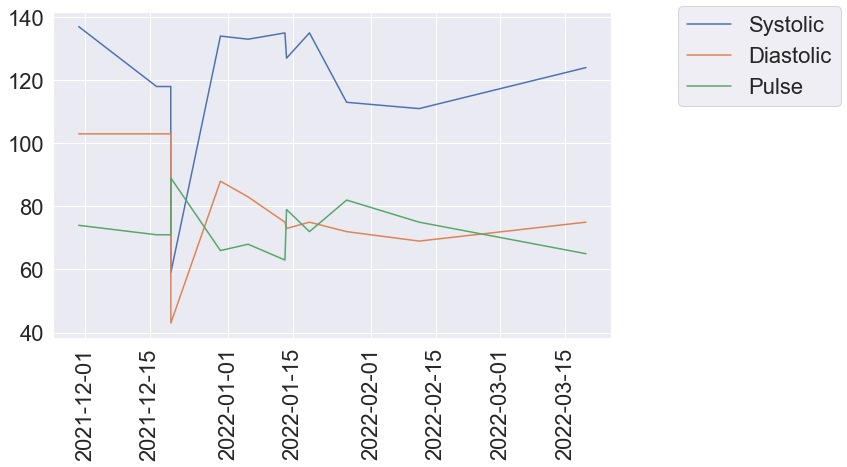

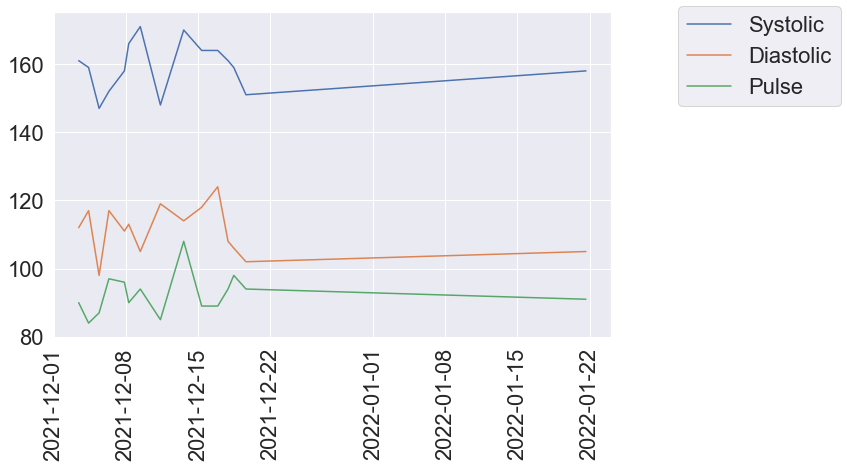

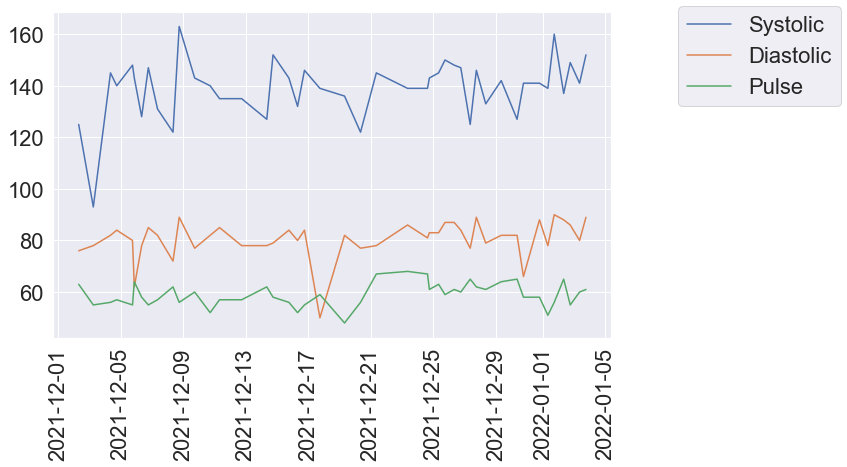

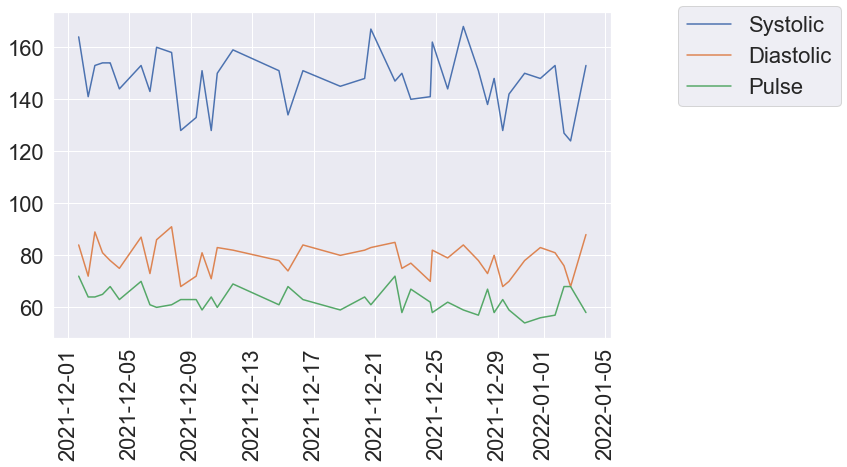

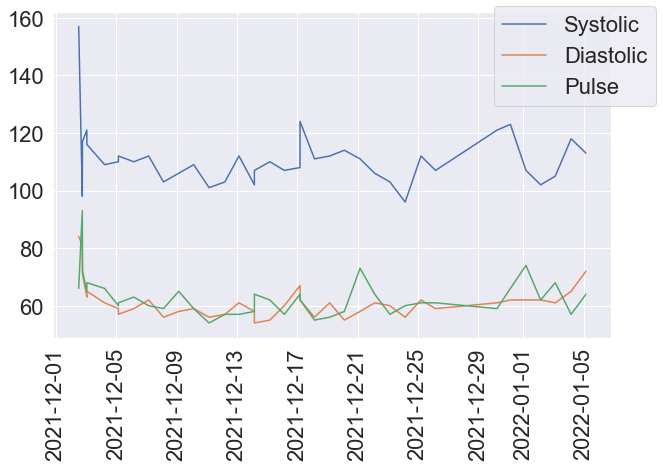

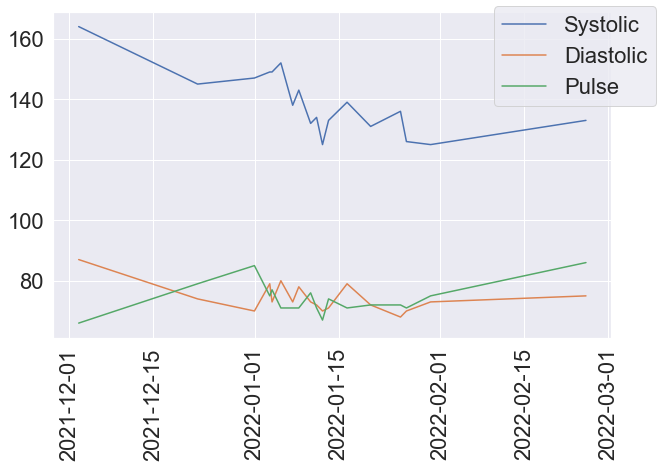

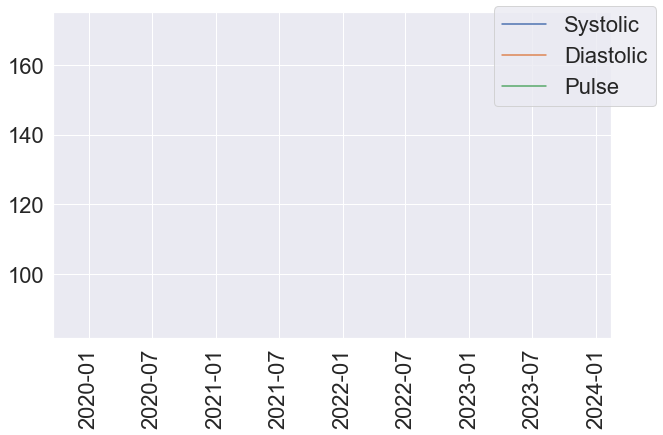

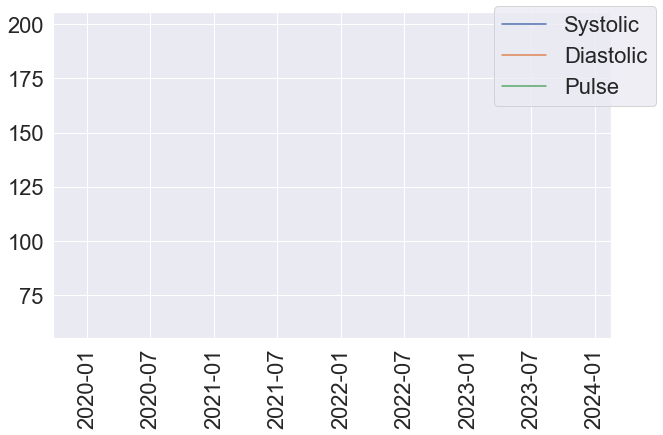

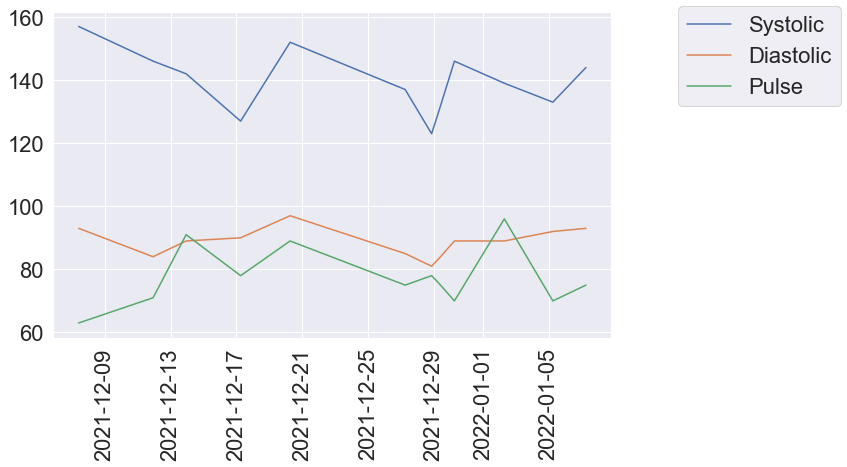

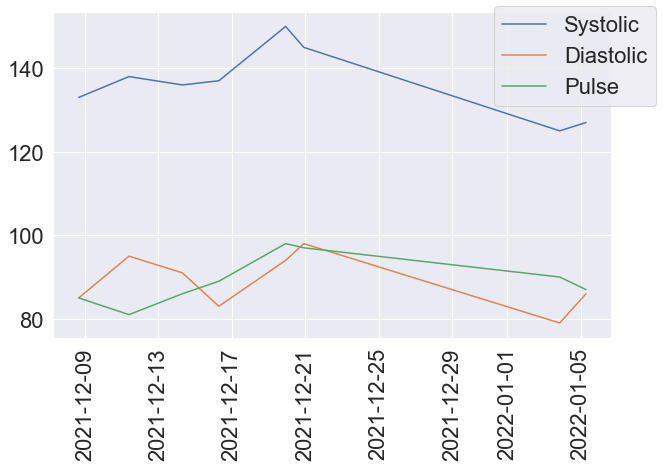

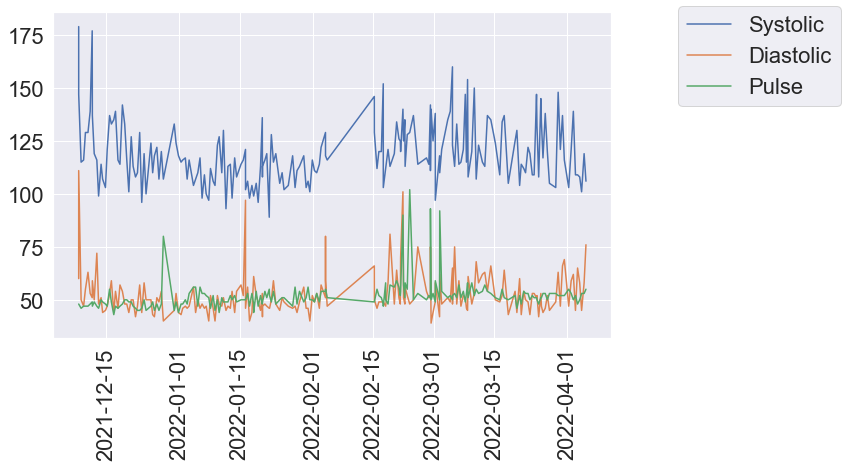

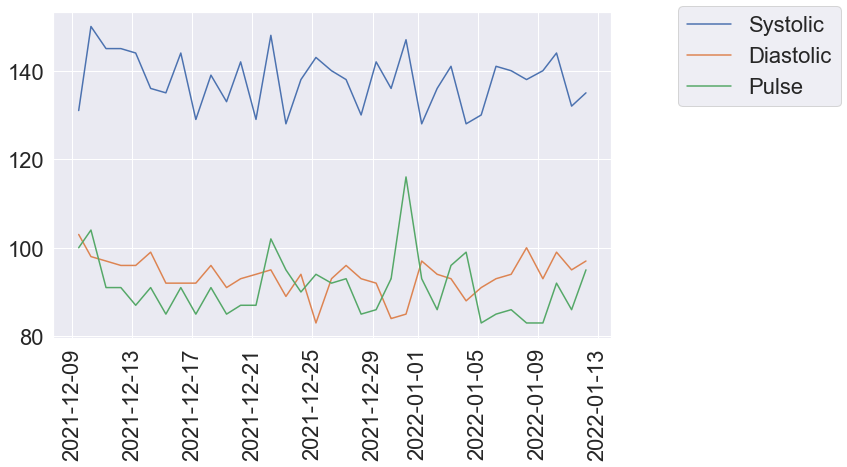

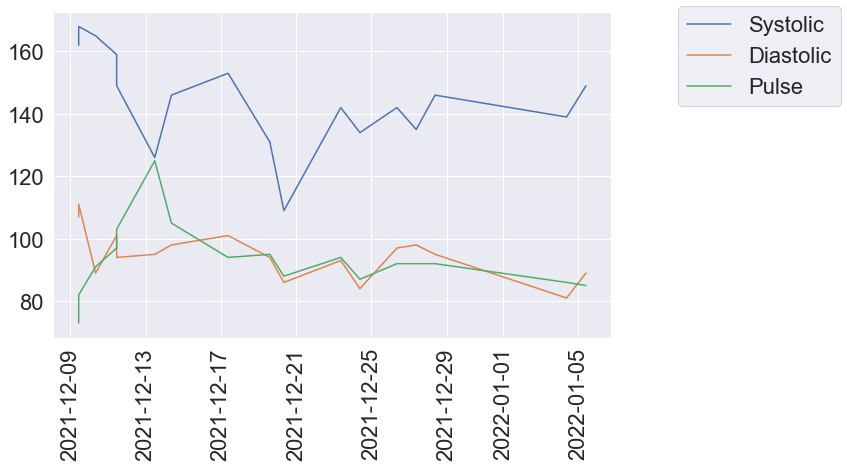

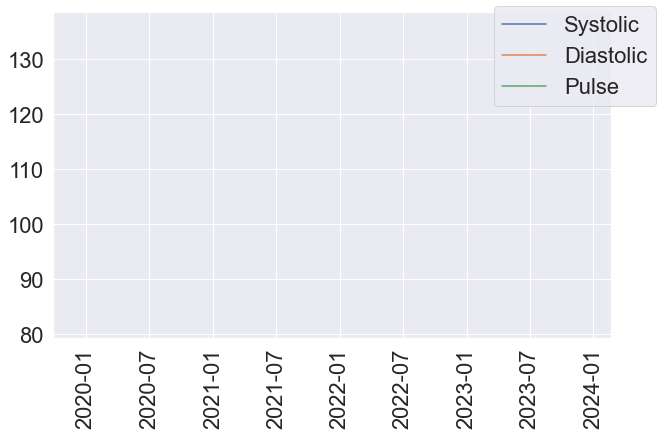

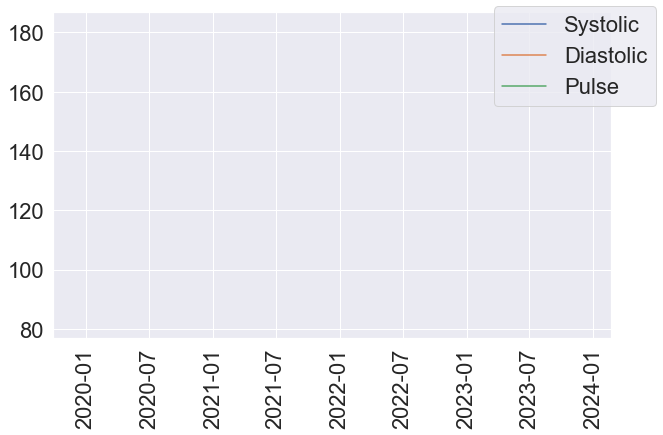

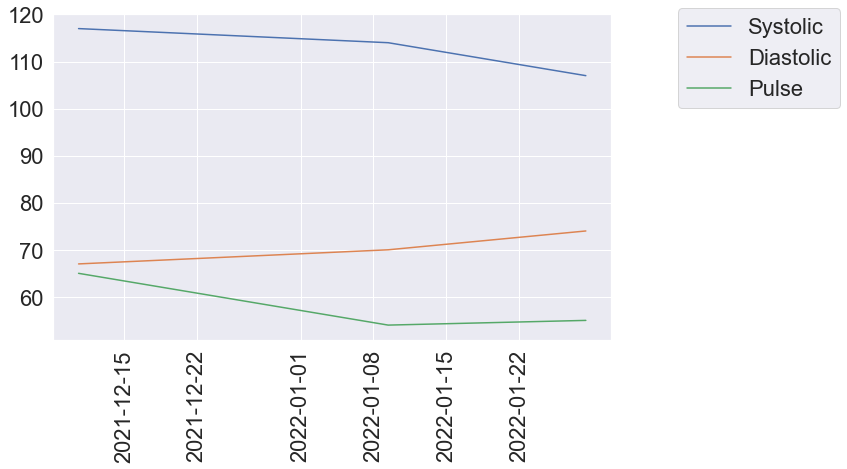

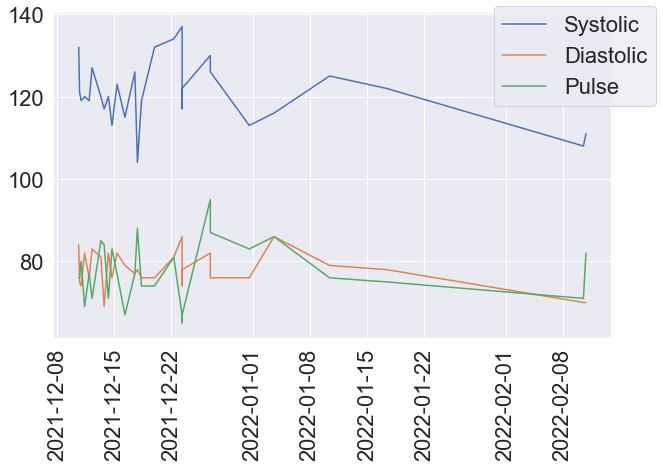

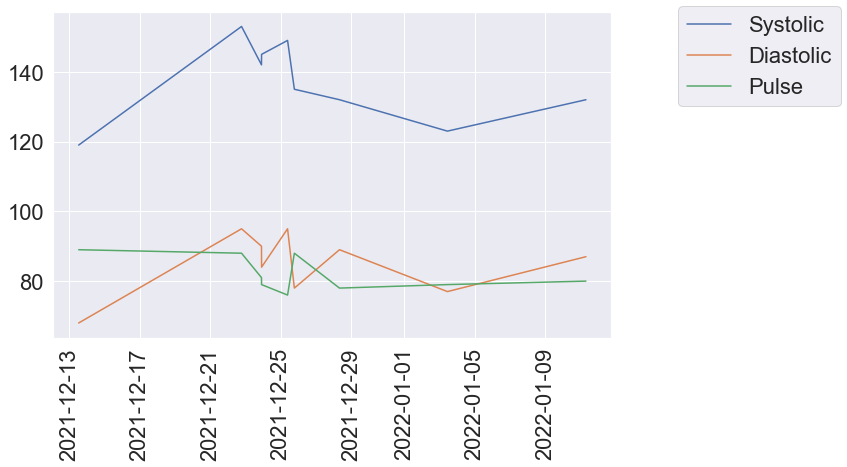

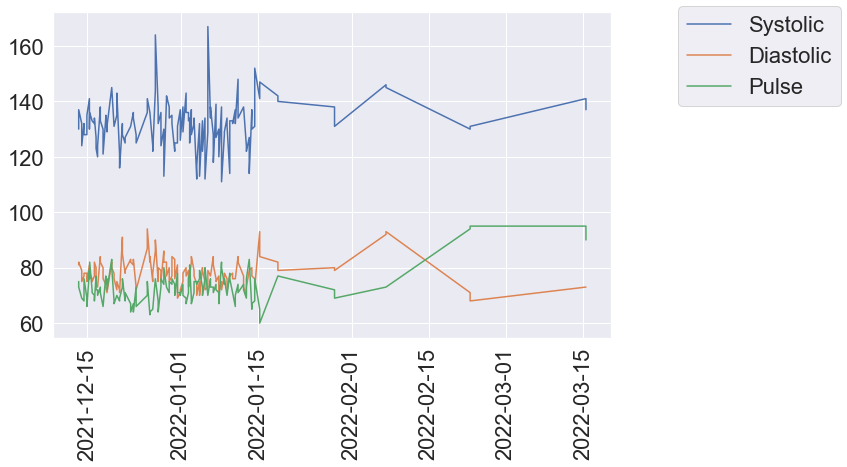

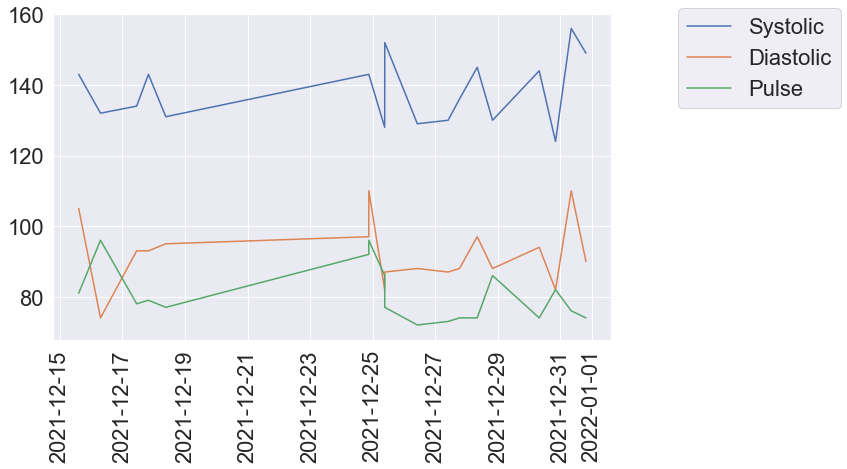

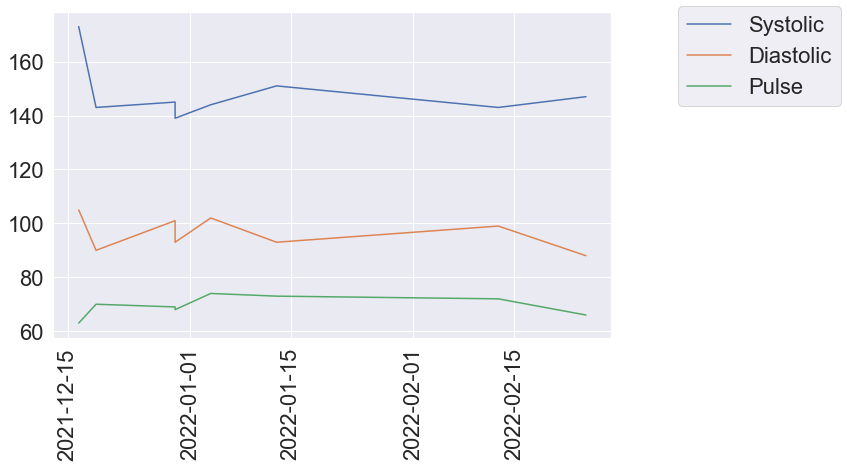

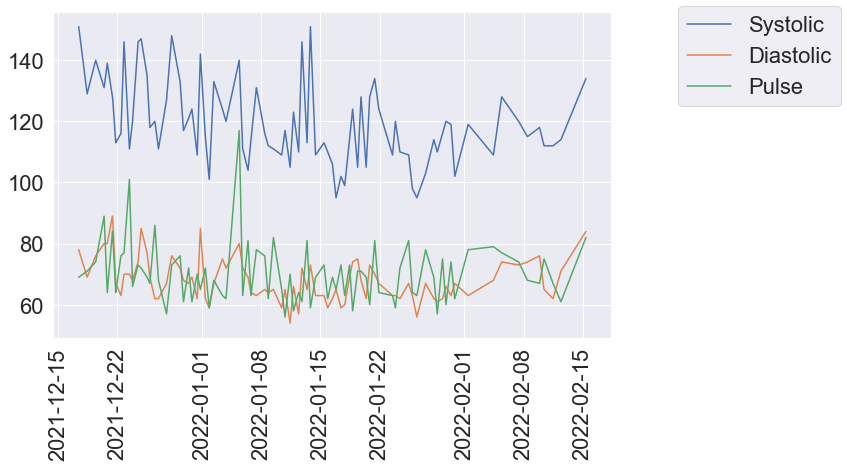

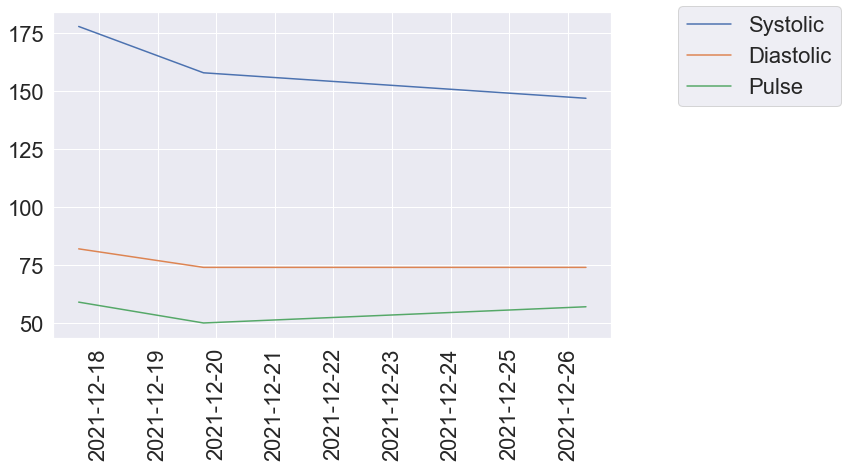

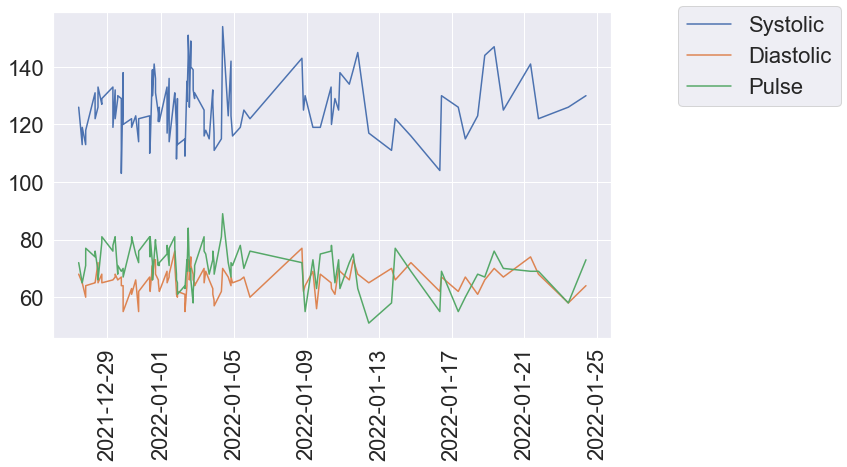

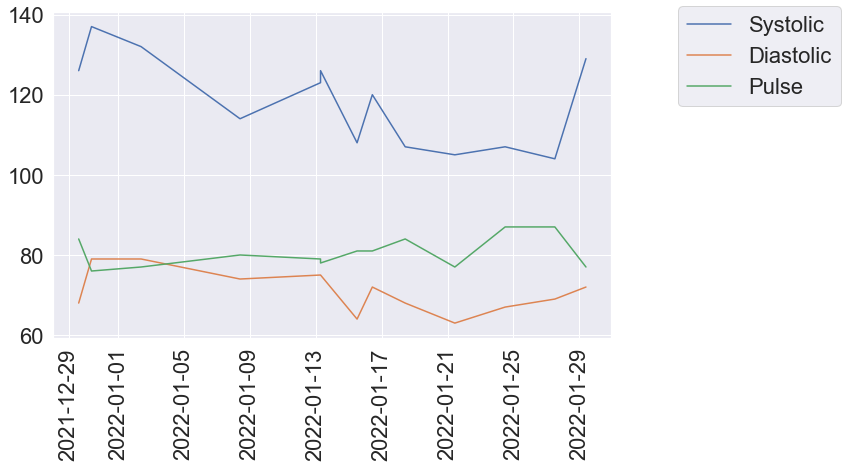

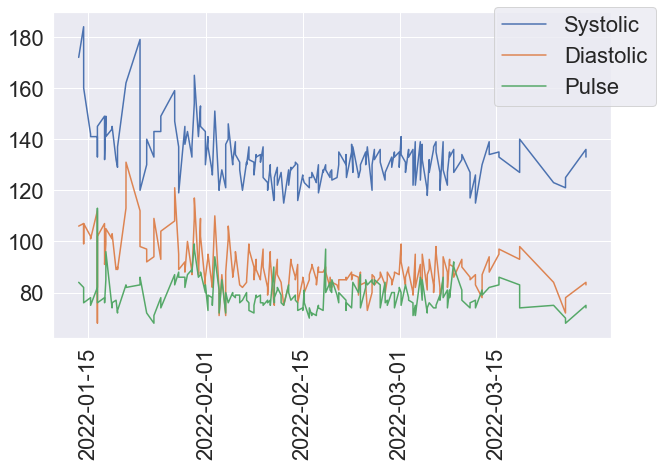

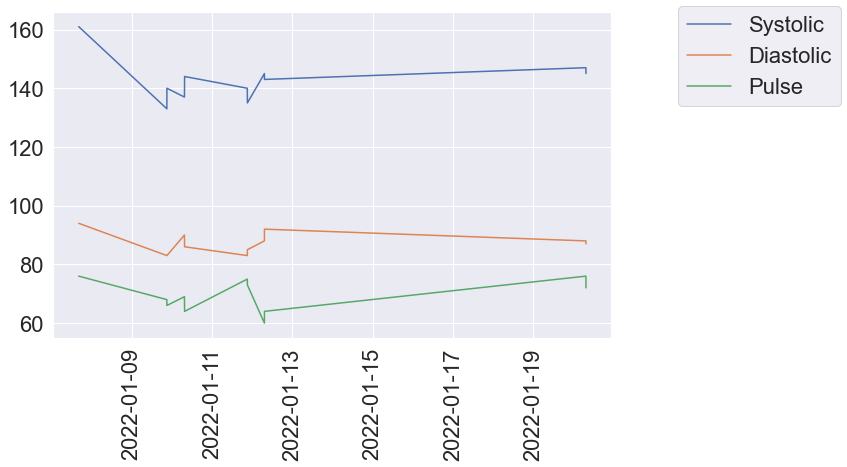

In [26]:
for d in bp.groupby(bp['userID']):
    plt.figure(figsize=(10, 6))
    plt.plot(d[1]['recordTime'],d[1]['systolic'], label = "Systolic")
    plt.plot(d[1]['recordTime'],d[1]['diastolic'], label = "Diastolic")
    plt.plot(d[1]['recordTime'],d[1]['pulse'], label = "Pulse")
    plt.legend(bbox_to_anchor=(1.1, 1.05))
    plt.xticks(rotation=90)
    plt.show()

In [56]:
bp.groupby(['userID'])[num].describe()

systolic                                                              \
          count        mean        std    min     25%    50%     75%    max   
userID                                                                        
14042     143.0  123.944056  11.627902   79.0  117.00  123.0  130.50  150.0   
14341      93.0  143.182796  25.871735  113.0  133.00  137.0  145.00  250.0   
14385      40.0  131.000000   6.850042  119.0  125.75  131.0  135.25  148.0   
14386      74.0  119.297297  10.629153   94.0  111.25  119.5  125.50  152.0   
14387       2.0  164.500000   0.707107  164.0  164.25  164.5  164.75  165.0   
...         ...         ...        ...    ...     ...    ...     ...    ...   
14570       3.0  161.000000  15.716234  147.0  152.50  158.0  168.00  178.0   
14582     110.0  125.981818  10.355145  103.0  119.00  125.0  132.00  154.0   
14589      14.0  117.285714  11.591964  104.0  107.00  117.0  126.00  137.0   
14593     214.0  132.612150  11.053606  115.0  126.00  130.0  137.00  184.0   
14614      11.0  142.727273   7.524505  133.0  138.50  143.0  145.00  161.0   

       diastolic              ...                 pulse                        \
           count        mean  ...     75%    max  count       mean        std   
userID                        ...                                               
14042      143.0   85.307692  ...   89.00   99.0  143.0  88.951049  11.900011   
14341       93.0   84.215054  ...   86.00  120.0   93.0  80.139785  62.106254   
14385       40.0   84.425000  ...   87.00  100.0   40.0  66.350000   4.995126   
14386       74.0   67.918919  ...   70.75   86.0   74.0  81.918919   5.976568   
14387        2.0  101.000000  ...  102.00  103.0    2.0  99.000000   1.414214   
...          ...         ...  ...     ...    ...    ...        ...        ...   
14570        3.0   76.666667  ...   78.00   82.0    3.0  55.333333   4.725816   
14582      110.0   65.690909  ...   68.00   77.0  110.0  71.281818   6.899185   
14589       14.0   71.000000  ...   74.75   79.0   14.0  81.071429   4.047113   
14593      214.0   89.551402  ...   93.00  131.0  214.0  79.177570   5.935195   
14614       11.0   87.181818  ...   89.00   94.0   11.0  69.363636   5.463931   

                                        
         min    25%   50%   75%    max  
userID                                  
14042    0.0  88.00  91.0  92.0  102.0  
14341   60.0  63.00  68.0  75.0  600.0  
14385   59.0  63.00  65.0  69.0   85.0  
14386   71.0  78.00  81.0  85.0  100.0  
14387   98.0  98.50  99.0  99.5  100.0  
...      ...    ...   ...   ...    ...  
14570   50.0  53.50  57.0  58.0   59.0  
14582   51.0  68.00  72.0  76.0   89.0  
14589   76.0  77.25  80.5  84.0   87.0  
14593   68.0  75.00  78.0  82.0  113.0  
14614   60.0  65.00  69.0  74.0   76.0  

[90 rows x 24 columns]

User table

In [27]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106 entries, 0 to 105
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userID       106 non-null    int64  
 1   gender       106 non-null    object 
 2   birthday     105 non-null    object 
 3   height       106 non-null    float64
 4   height_unit  106 non-null    object 
 5   marital      47 non-null     object 
 6   smoking      106 non-null    object 
 7   race         51 non-null     object 
 8   weight       106 non-null    float64
 9   life_style   106 non-null    float64
 10  Eduction     50 non-null     object 
 11  age          105 non-null    float64
dtypes: float64(4), int64(1), object(7)
memory usage: 10.1+ KB


In [28]:
user

userID  gender    birthday  height height_unit  marital smoking  \
0     14677    Male  1946-03-21   180.0          cm  Married      No   
1     14645  Female  1966-06-29   155.0          cm      NaN     Yes   
2     14614  Female  1974-12-14   161.0          cm      NaN     Yes   
3     14593    Male  1985-03-30   168.0          cm   Single      No   
4     14592  Female  1977-12-10   155.0          cm      NaN     Yes   
..      ...     ...         ...     ...         ...      ...     ...   
101   14386    Male  1956-09-25   180.0          cm  Married      No   
102   14385    Male  1962-12-22   164.0          cm      NaN     Yes   
103   14341    Male         NaT   172.0          cm      NaN      No   
104   14319    Male  1990-10-04   170.0          cm      NaN      No   
105   14042    Male  1991-05-16   165.0          cm   Single      No   

           race  weight  life_style                         Eduction   age  
0        Indian    80.0       1.200     College/university completed  76.0  
1           NaN    57.0       0.000                              NaN  55.0  
2           NaN    78.5       0.000                              NaN  47.0  
3       Chinese    84.0       1.200     College/university completed  37.0  
4           NaN    57.0       0.000                              NaN  44.0  
..          ...     ...         ...                              ...   ...  
101      Indian    80.0       1.550  Secondary/high school completed  65.0  
102         NaN    78.0       0.000                              NaN  59.0  
103         NaN    65.0       1.200                              NaN   NaN  
104     Chinese    70.0       1.375                              NaN  31.0  
105  Bumiputera    70.0       1.200     College/university completed  31.0  

[106 rows x 12 columns]

In [29]:
user['gender'].value_counts()


Male      53
Female    52
Other      1
Name: gender, dtype: int64

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


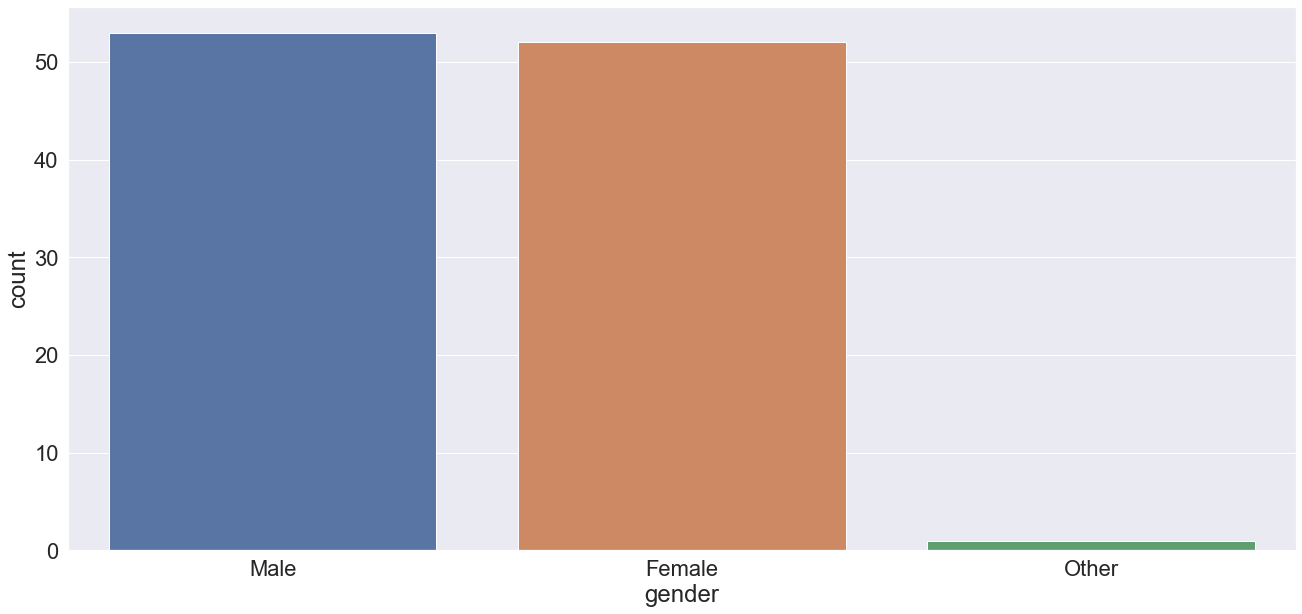

In [30]:
plt.figure(figsize=(22,10))
sns.countplot(user['gender'])
plt.show()

In [31]:
user['marital'].value_counts()


Married     41
Single       5
Divorced     1
Name: marital, dtype: int64

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


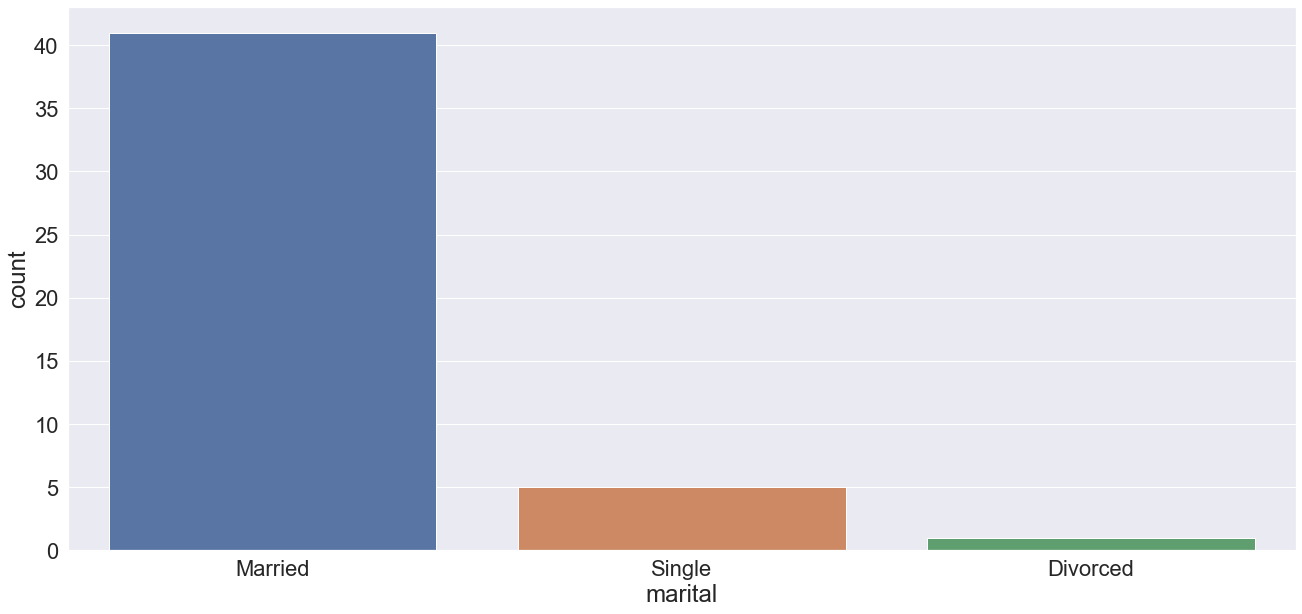

In [32]:
plt.figure(figsize=(22,10))
sns.countplot(user['marital'])
plt.show()

In [33]:
user['smoking'].value_counts()


No     66
Yes    40
Name: smoking, dtype: int64

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


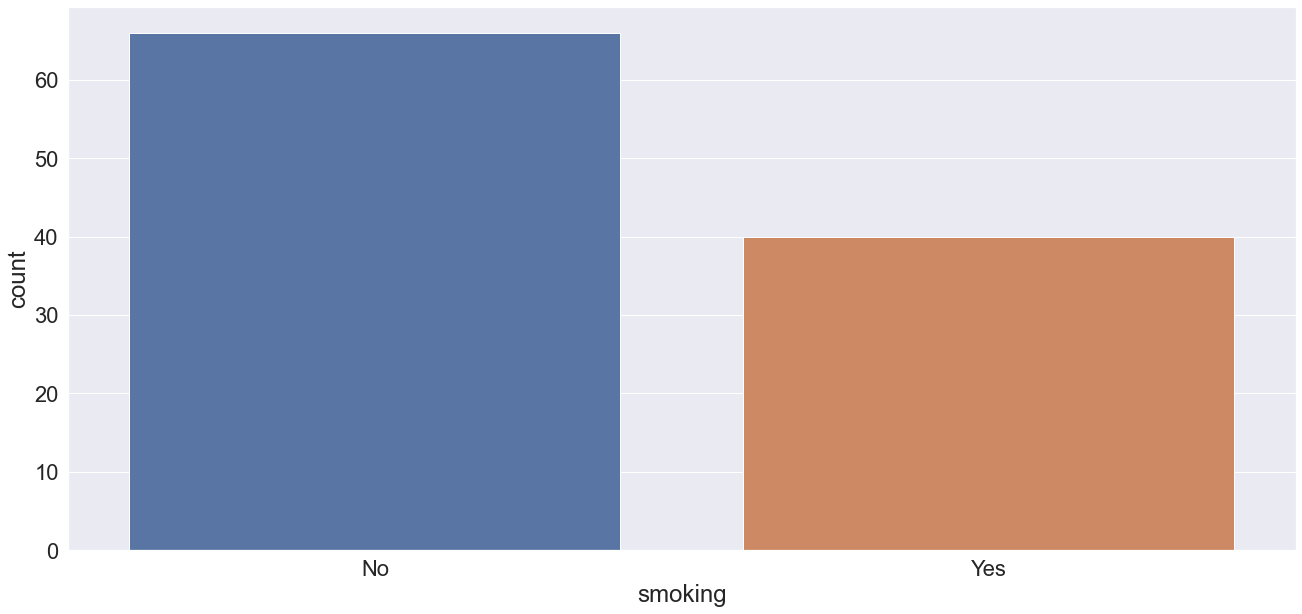

In [34]:
plt.figure(figsize=(22,10))
sns.countplot(user['smoking'])
plt.show()

In [35]:
user['race'].value_counts()


Bumiputera    21
Chinese       18
Indian        11
Other          1
Name: race, dtype: int64

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


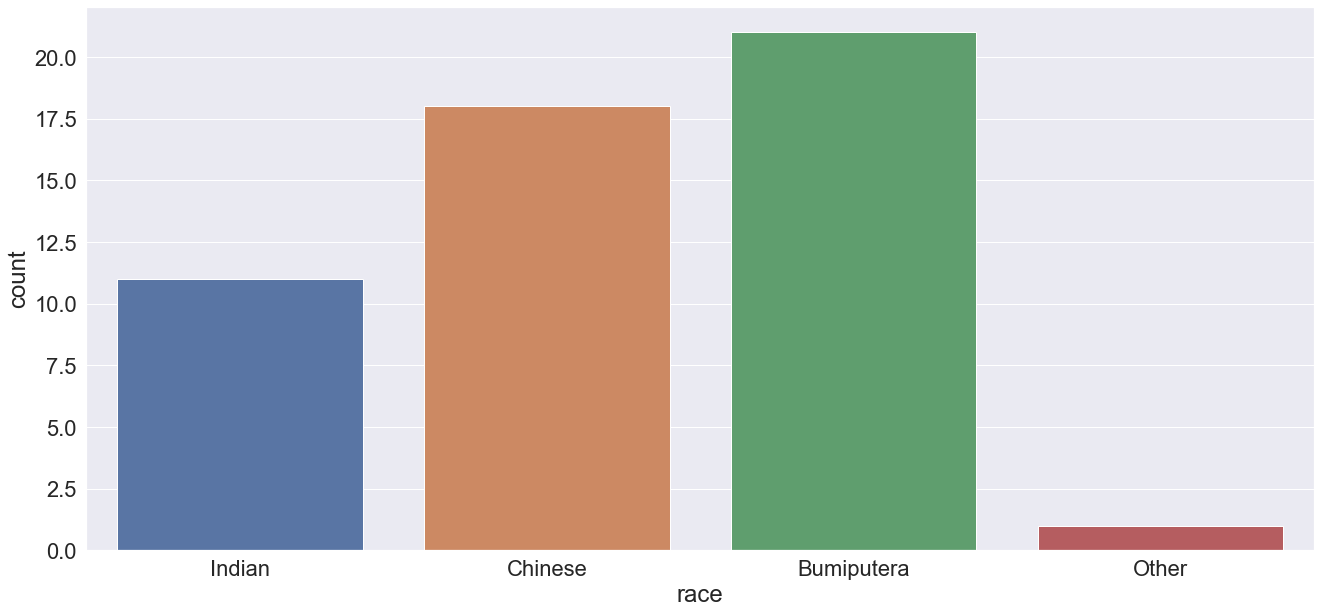

In [36]:
plt.figure(figsize=(22,10))
sns.countplot(user['race'])
plt.show()

In [37]:
user['life_style'].value_counts()


0.000    44
1.200    27
1.550    23
1.375    12
Name: life_style, dtype: int64

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


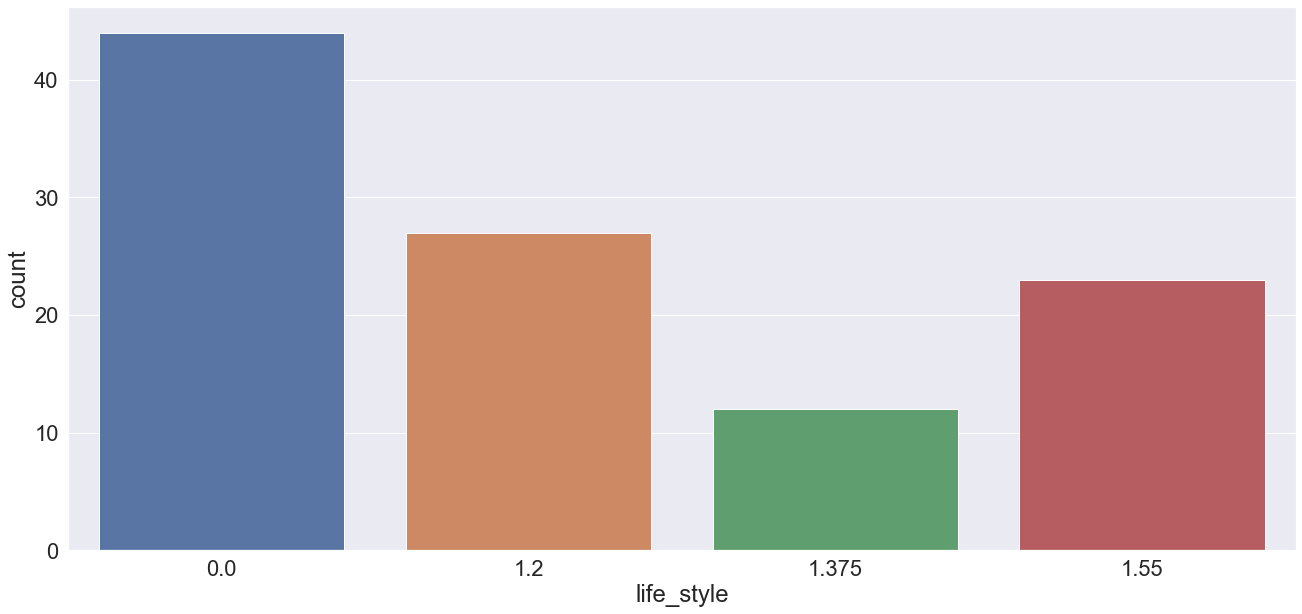

In [38]:
plt.figure(figsize=(22,10))
sns.countplot(user['life_style'])
plt.show()

In [39]:
user['Eduction'].value_counts()


College/university completed       24
Secondary/high school completed    22
Primary school completed            4
Name: Eduction, dtype: int64

C:\Users\Acer\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


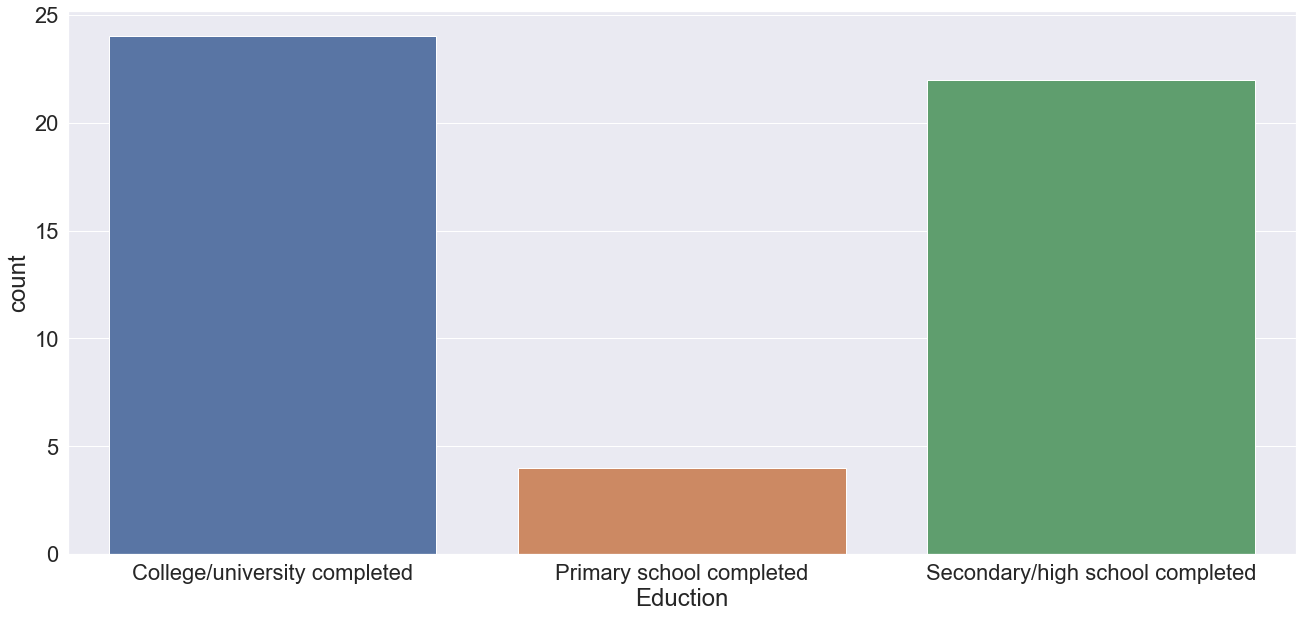

In [40]:
plt.figure(figsize=(22,10))
sns.countplot(user['Eduction'])
plt.show()

Next step is to consider the following addition
-multivariate plots
-multidimensional distribution
-bayesian level of blood pressure
-statistical analysis of each patient
-distribution plots in seaborn

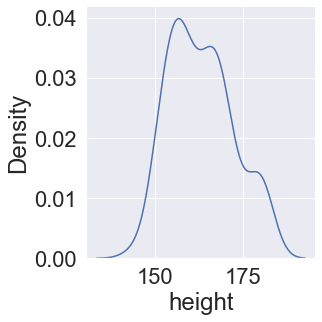

In [41]:
sns.displot(data=user, x=user['height'],kind="kde")


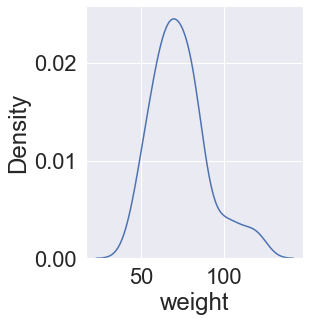

In [42]:
sns.displot(data=user, x=user['weight'],kind="kde")


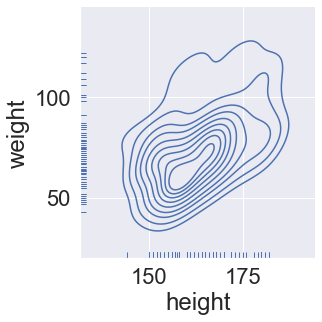

In [43]:
sns.displot(data=user, x=user['height'],y =user['weight'],kind="kde",rug=True)


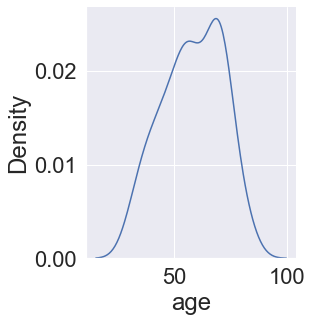

In [44]:
sns.displot(data=user, x=user['age'],kind="kde")

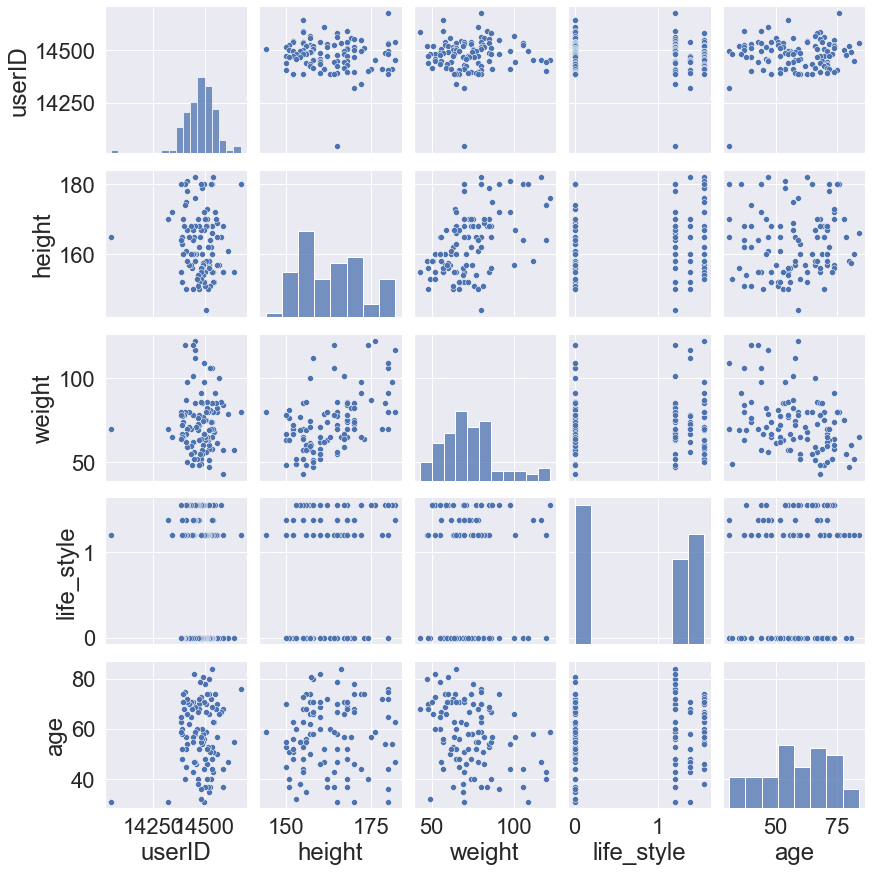

In [45]:
sns.pairplot(user)

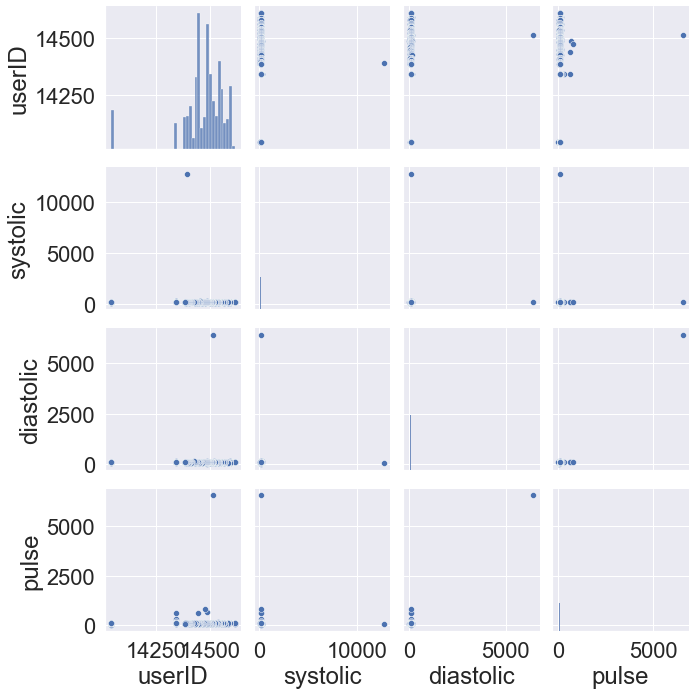

In [46]:
sns.pairplot(bp)